<a class="anchor" id="top"></a>

# <center>Machine Learning Project Code</center>

<a class="anchor" id="top"></a>

## <center>*01 - Exploratory Data Analysis*</center>

** **



# Table of Contents  <br>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    
   2.1 [Variable Exploration](#2.1-Variable-Exploration) <br>
   
   &emsp; 2.1.1 [Univariate Analysis](#2.1.1-Univariate-Analysis) <br>
   
   &emsp; 2.1.2 [Bivariate Analysis](#2.1.2-Bivariate-Analysis) <br><br>
  
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)

   3.1 [Duplicates](#3.1-Duplicates) <br>
   
   3.2 [Feature Engineering](#3.2-Feature-Engineering) <br>
   
   &emsp; 3.2.1 [Encoding](#3.2.1-Encoding) <br>
   
   &emsp; 3.2.2 [Feature Creation](#3.2.2-Feature-Creation) <br><br>


5. [Export](#5.-Export)


** **

This notebook will consist of Exploratory Data Analysis and Data Cleaning and Preprocessing. To explore the data, several statistical methods and visualisations were used. In the Data Cleaning and Preprocessing, Duplicates will be addressed, Feature Engineering will be performed and missing values will be treated with simple methods (eg. fill with median). Then the treated data will be exported to be used in the following notebooks.

Data Scientist Manager: António Oliveira, **20211595**

Data Scientist Senior: Tomás Ribeiro, **20240526**

Data Scientist Junior: Gonçalo Pacheco, **20240695**

Data Analyst Senior: Gonçalo Custódio, **20211643**

Data Analyst Junior: Ana Caleiro, **20240696**

** **


# 1. Importing Libraries & Data

In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [33]:
import pandas as pd
import numpy as np


import utils as u

import matplotlib.pyplot as plt
import seaborn as sns
import viz as v
import map_ as map_

%matplotlib inline

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
# Load training data
df = pd.read_csv('./data/train_data.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./data/test_data.csv', index_col = 'Claim Identifier')

# Display the first 3 rows of the training data
df.head(3)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   
5393889             2019-12-06           40.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   
5393889             2020-01-01                       N              1434.80   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393875               1988.0  2019-12-31         NaN   
5393091               1973.0  2020-01-01  2020-01-14   
5393889               1979.0  2020-01-01         NaN   

                                  Carrier Name Carrier Type Claim Injury Type  \
Claim Identifier                                                                
5393875             NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE       2. NON-COMP   
5393091           ZURICH AMERICAN INSURANCE CO  1A. PRIVATE      4. TEMPORARY   
5393889              INDEMNITY INSURANCE CO OF  1A. PRIVATE      4. TEMPORARY   

                 County of Injury COVID-19 Indicator District Name  \
Claim Identifier                                                     
5393875              ST. LAWRENCE                  N      SYRACUSE   
5393091                   WYOMING                  N     ROCHESTER   
5393889                    ORANGE                  N        ALBANY   

                 First Hearing Date Gender  IME-4 Count  Industry Code  \
Claim Identifier                                                         
5393875                         NaN      M          NaN           44.0   
5393091                  2020-02-21      F          4.0           23.0   
5393889                         NaN      M          NaN           56.0   

                                          Industry Code Description  \
Claim Identifier                                                      
5393875                                                RETAIL TRADE   
5393091                                                CONSTRUCTION   
5393889           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...   

                 Medical Fee Region  OIICS Nature of Injury Description  \
Claim Identifier                                                          
5393875                           I                                 NaN   
5393091                           I                                 NaN   
5393889                          II                                 NaN   

                  WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
5393875                                27.0     FROM LIQUID OR GREASE SPILLS   
5393091                                97.0                REPETITIVE MOTION   
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
5393875                                 10.0   
5393091                                 49.0   
5393889                                  7.0   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
5393875                                  CONTUSION                    62.0   
5393091                             SPRAIN OR TEAR                    38.0   
5393889                                 CONCUSSION                    10.0   

                 WCIO Part Of Body Description

# 2. Exploratory Data Analysis
This section is dedicated to conducting an in-depth Exploratory Data Analysis (EDA) to comprehend the dataset’s structure, statistical properties, and inherent patterns. Through systematic analysis, we aim to identify key relationships among variables, detect potential anomalies, and evaluate the completeness and quality of the data. The findings from this stage serve as a critical foundation for subsequent data preprocessing and model development, ensuring that informed and data-driven decisions guide the overall analytical workflow.

<a href="#top">Top &#129033;</a>

**Profile Report**

In [83]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

From using a `Profile Report` we were able to identify some possible problems about variables:
- WCB Decision has constant value "Not Work Related"
- Alternative Dispute Resolution is highly imbalanced (97.3%)
- C-3 Date has 406226 (68.4%) missing values
- First Hearing Date has 442673 (74.6%) missing values
- IME-4 Count has 460668 (77.6%) missing values
- OIICS Nature of Injury Description has 593471 (100.0%) missing values
- Zip Code is an unsupported type, check if it needs cleaning or further analysis
- Average Weekly Wage has 335450 (56.5%) zeros
- Birth Year has 25081 (4.2%) zeros
- Claim Injury Type (Target) has 19445 (3.3%) missing values and is imbalanced

And about the dataset itself:
- Dataset has 1103 (0.2%) duplicate rows

The same method was applied to test data

In [84]:
# profile_test = ProfileReport(
#     test, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile_test

From using a `Profile Report` for the test data we were able to identify some possible problems about variables:
- Alternative Dispute Resolution is highly imbalanced (97.5%)
- COVID-19 Indicator is highly imbalanced (94.3%)
- First Hearing Date has 344947 (88.9%) missing values
- IME-4 Count has 352726 (90.9%) missing values
- OIICS Nature of Injury Description has 387975 (100.0%) missing values

And about the test dataset itself: 
- Dataset has 2 (< 0.1%) duplicate rows

There are also columns that are present in the train data but not in the test data (apart from our Target variable):
- Agreement Reached
- WCB Decision

After using `Profile Report`, we will also employ well known methods for basic statistics, such as `describe`, `info` and `shape`, as well as print the unique values for each column.

In [85]:
# The "include='object'" argument limits the description to only categorical data types.
# Transpose the result (.T) to display statistics in a more readable format with rows as columns.
df.describe(include='object').T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389  10060   
WCB Decision                       574026      1   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3302  
WCB Decision                                        Not Work Related  574026

In [86]:
# .describe provides statistical summaries for the numerical columns
df.describe().T

count         mean          std   min  \
Age at Injury                       574026.0    42.114270    14.256432   0.0   
Average Weekly Wage                 545375.0   491.088321  6092.918120   0.0   
Birth Year                          544948.0  1886.767604   414.644423   0.0   
IME-4 Count                         132803.0     3.207337     2.832303   1.0   
Industry Code                       564068.0    58.645305    19.644175  11.0   
OIICS Nature of Injury Description       0.0          NaN          NaN   NaN   
WCIO Cause of Injury Code           558386.0    54.381143    25.874281   1.0   
WCIO Nature of Injury Code          558369.0    41.013839    22.207521   1.0   
WCIO Part Of Body Code              556944.0    39.738146    22.365940  -9.0   
Agreement Reached                   574026.0     0.046665     0.210921   0.0   
Number of Dependents                574026.0     3.006559     2.000801   0.0   

                                       25%     50%     75%        max  
Age at Injury                         31.0    42.0    54.0      117.0  
Average Weekly Wage                    0.0     0.0   841.0  2828079.0  
Birth Year                          1965.0  1977.0  1989.0     2018.0  
IME-4 Count                            1.0     2.0     4.0       73.0  
Industry Code                         45.0    61.0    71.0       92.0  
OIICS Nature of Injury Description     NaN     NaN     NaN        NaN  
WCIO Cause of Injury Code             31.0    56.0    75.0       99.0  
WCIO Nature of Injury Code            16.0    49.0    52.0       91.0  
WCIO Part Of Body Code                33.0    38.0    53.0       99.0  
Agreement Reached                      0.0     0.0     0.0        1.0  
Number of Dependents                   1.0     3.0     5.0        6.0

In [87]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [88]:
# Check the dimensions of the dataset (number of rows and columns)
df.shape

(593471, 32)

In [89]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 20
    if df[column].nunique() < 20:
        
        # Print unique values and count for columns with fewer than 20 unique values
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
Number of unique values: 3

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
Number of unique values: 2

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Number of unique values: 8

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Number of unique values: 8

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
Number of unique values: 2

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
Number of unique values: 8

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
Number of unique values: 4

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK'

From these, we were able to conclude that the dataset had 593471 rows and 32 columns. 

Additionally, we noticed that:
- WCB Decision only had 1 unique value
- We have 4 different values for Gender
- Age ranges from 0 to 117
- Birth Year ranges from 0 to 2018


There is also a column which is always null, **OIICS Nature of Injury Description**.

## 2.1 Variable Exploration

Incoherencies, can compromise the integrity of the analysis and the performance of machine learning models. By systematically identifying and addressing these issues, we aim to enhance data quality and ensure the dataset is both accurate and reliable for subsequent preprocessing and modeling stages.

<a href="#top">Top &#129033;</a>

In this section we will start by dropping the features that exist in the train data (df) but not in the test, as well **OIICS Nature of Injury Description**, which is always null.

We will also correct the date datatypes in both df and test.

Then, we will individually analyze each variable to better understand it.

In [3]:
columns = ['Agreement Reached', 'WCB Decision', 'OIICS Nature of Injury Description']

In [4]:
df = df.drop(columns = columns, axis = 1)
test = test.drop(columns = columns[-1], axis = 1)

In [5]:
# List of columns to convert to datetime
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Apply pd.to_datetime() to each column in the list for both df and test
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')


Having made these initial transformations, we will start the exploration by comparing the minimum, average and maximum values of both df and test datasets, for all numeric variables

In [93]:
num_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

obj_columns = [col for col in df.columns if isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].dtype == 'object']

In [94]:
num_stats_compare = u.num_stats(df, test, num_columns)
num_comparison_df = pd.DataFrame(num_stats_compare).T
num_comparison_df

DF Mean    Test Mean       DF Std  \
Age at Injury                 42.114270    41.414944    14.256432   
Average Weekly Wage          491.088321   183.343831  6092.918120   
Birth Year                  1886.767604  1875.383466   414.644423   
IME-4 Count                    3.207337     2.118131     2.832303   
Industry Code                 58.645305    58.653581    19.644175   
WCIO Cause of Injury Code     54.381143    53.335678    25.874281   
WCIO Nature of Injury Code    41.013839    38.373674    22.207521   
WCIO Part Of Body Code        39.738146    31.516109    22.365940   
Number of Dependents           3.006559     3.000284     2.000801   

                               Test Std  DF Min  Test Min  DF 25%  Test 25%  \
Age at Injury                 14.501056     0.0       0.0    31.0      30.0   
Average Weekly Wage         3542.310214     0.0       0.0     0.0       0.0   
Birth Year                   444.659075     0.0       0.0  1965.0    1967.0   
IME-4 Count                    1.465406     1.0       1.0     1.0       1.0   
Industry Code                 18.710501    11.0      11.0    45.0      45.0   
WCIO Cause of Injury Code     26.176833     1.0       1.0    31.0      29.0   
WCIO Nature of Injury Code    20.966100     1.0       1.0    16.0      10.0   
WCIO Part Of Body Code        23.359950    -9.0      -9.0    33.0      15.0   
Number of Dependents           1.997982     0.0       0.0     1.0       1.0   

                            DF 50%  Test 50%  DF 75%  Test 75%     DF Max  \
Age at Injury                 42.0      40.0    54.0      53.0      117.0   
Average Weekly Wage            0.0       0.0   841.0       0.0  2828079.0   
Birth Year                  1977.0    1980.0  1989.0    1992.0     2018.0   
IME-4 Count                    2.0       2.0     4.0       2.0       73.0   
Industry Code                 61.0      61.0    71.0      71.0       92.0   
WCIO Cause of Injury Code     56.0      56.0    75.0      74.0       99.0   
WCIO Nature of Injury Code    49.0      43.0    52.0      52.0       91.0   
WCIO Part Of Body Code        38.0      36.0    53.0      51.0       99.0   
Number of Dependents           3.0       3.0     5.0       5.0        6.0   

                             Test Max  
Age at Injury                   114.0  
Average Weekly Wage         1950317.0  
Birth Year                     2019.0  
IME-4 Count                      18.0  
Industry Code                    92.0  
WCIO Cause of Injury Code        99.0  
WCIO Nature of Injury Code       91.0  
WCIO Part Of Body Code           99.0  
Number of Dependents              6.0

From this table, the main conclusions are:
- **Average Weekly Wage** mean values in DF (491) are much larger than in test (183)
- **Average Weekly Wage** values in the 75% percentile are much larger in df (841) than in test (0), which indicates a distribution shift between DF and test sets

Apart from these, there are no other significant differences in the numeric columns of both sets.

In [95]:
obj_stats_compare = u.obj_stats(df, test, obj_columns)
obj_comparison_df = pd.DataFrame(obj_stats_compare).T
obj_comparison_df

DF Unique Test Unique  \
Alternative Dispute Resolution            3           3   
Attorney/Representative                   2           2   
Carrier Name                           2046        1598   
Carrier Type                              8           7   
County of Injury                         63          63   
COVID-19 Indicator                        2           2   
District Name                             8           8   
Gender                                    4           4   
Industry Code Description                20          20   
Medical Fee Region                        5           5   
WCIO Cause of Injury Description         74          74   
WCIO Nature of Injury Description        56          56   
WCIO Part Of Body Description            54          51   
Zip Code                              10060        6276   

                                                             DF Mode  \
Alternative Dispute Resolution                                     N   
Attorney/Representative                                            N   
Carrier Name                                    STATE INSURANCE FUND   
Carrier Type                                             1A. PRIVATE   
County of Injury                                             SUFFOLK   
COVID-19 Indicator                                                 N   
District Name                                                    NYC   
Gender                                                             M   
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE   
Medical Fee Region                                                IV   
WCIO Cause of Injury Description                             LIFTING   
WCIO Nature of Injury Description                     STRAIN OR TEAR   
WCIO Part Of Body Description                        LOWER BACK AREA   
Zip Code                                                       11236   

                                                                Test Mode  \
Alternative Dispute Resolution                                          N   
Attorney/Representative                                                 N   
Carrier Name                                         STATE INSURANCE FUND   
Carrier Type                                                  1A. PRIVATE   
County of Injury                                                   QUEENS   
COVID-19 Indicator                                                      N   
District Name                                                         NYC   
Gender                                                                  M   
Industry Code Description               HEALTH CARE AND SOCIAL ASSISTANCE   
Medical Fee Region                                                     IV   
WCIO Cause of Injury Description   FELLOW WORKER, PATIENT OR OTHER PERSON   
WCIO Nature of Injury Description                          STRAIN OR TEAR   
WCIO Part Of Body Description                                    MULTIPLE   
Zip Code                                                            11368   

                                  DF Top Value Count Test Top Value Count  
Alternative Dispute Resolution                571412               386314  
Attorney/Representative                       392291               306476  
Carrier Name                                  111144                66189  
Carrier Type                                  285368               201827  
County of Injury                               60430                40358  
COVID-19 Indicator                            546505               385434  
District Name                                 270779               187972  
Gender                                        335218               215343  
Industry Code Description                     114339                72207  
Medical Fee Region                            265981               182276  
WCIO Cause of Injury Description               46610                33293  

From this table, the main conclusions are:
- **Carrier Type** has 8 unique values in DF, but only 7 in test
- **WCIO Part Of Body Description** has 54 unique values in DF, but only 51 in test
- **County of Injury** Mode is SUFFOLK in DF, but QUEENS in test
- **WCIO Cause of Injury Description** and **WCIO Part Of Body Description** have different modes from DF to test

In [96]:
copy_df = df.copy()
len_df = len(df)
len_df

593471

### 2.1.1 Univariate Analysis

<a href="#top">Top &#129033;</a>

In this section we will individually analyse each variable. In the case of numeric variables, some thresholds will be set. For categorical variables, the number of observations for each category will be noted, and later we will decide if some categories can be grouped together, or if they can be removed.

### Numerical Variables

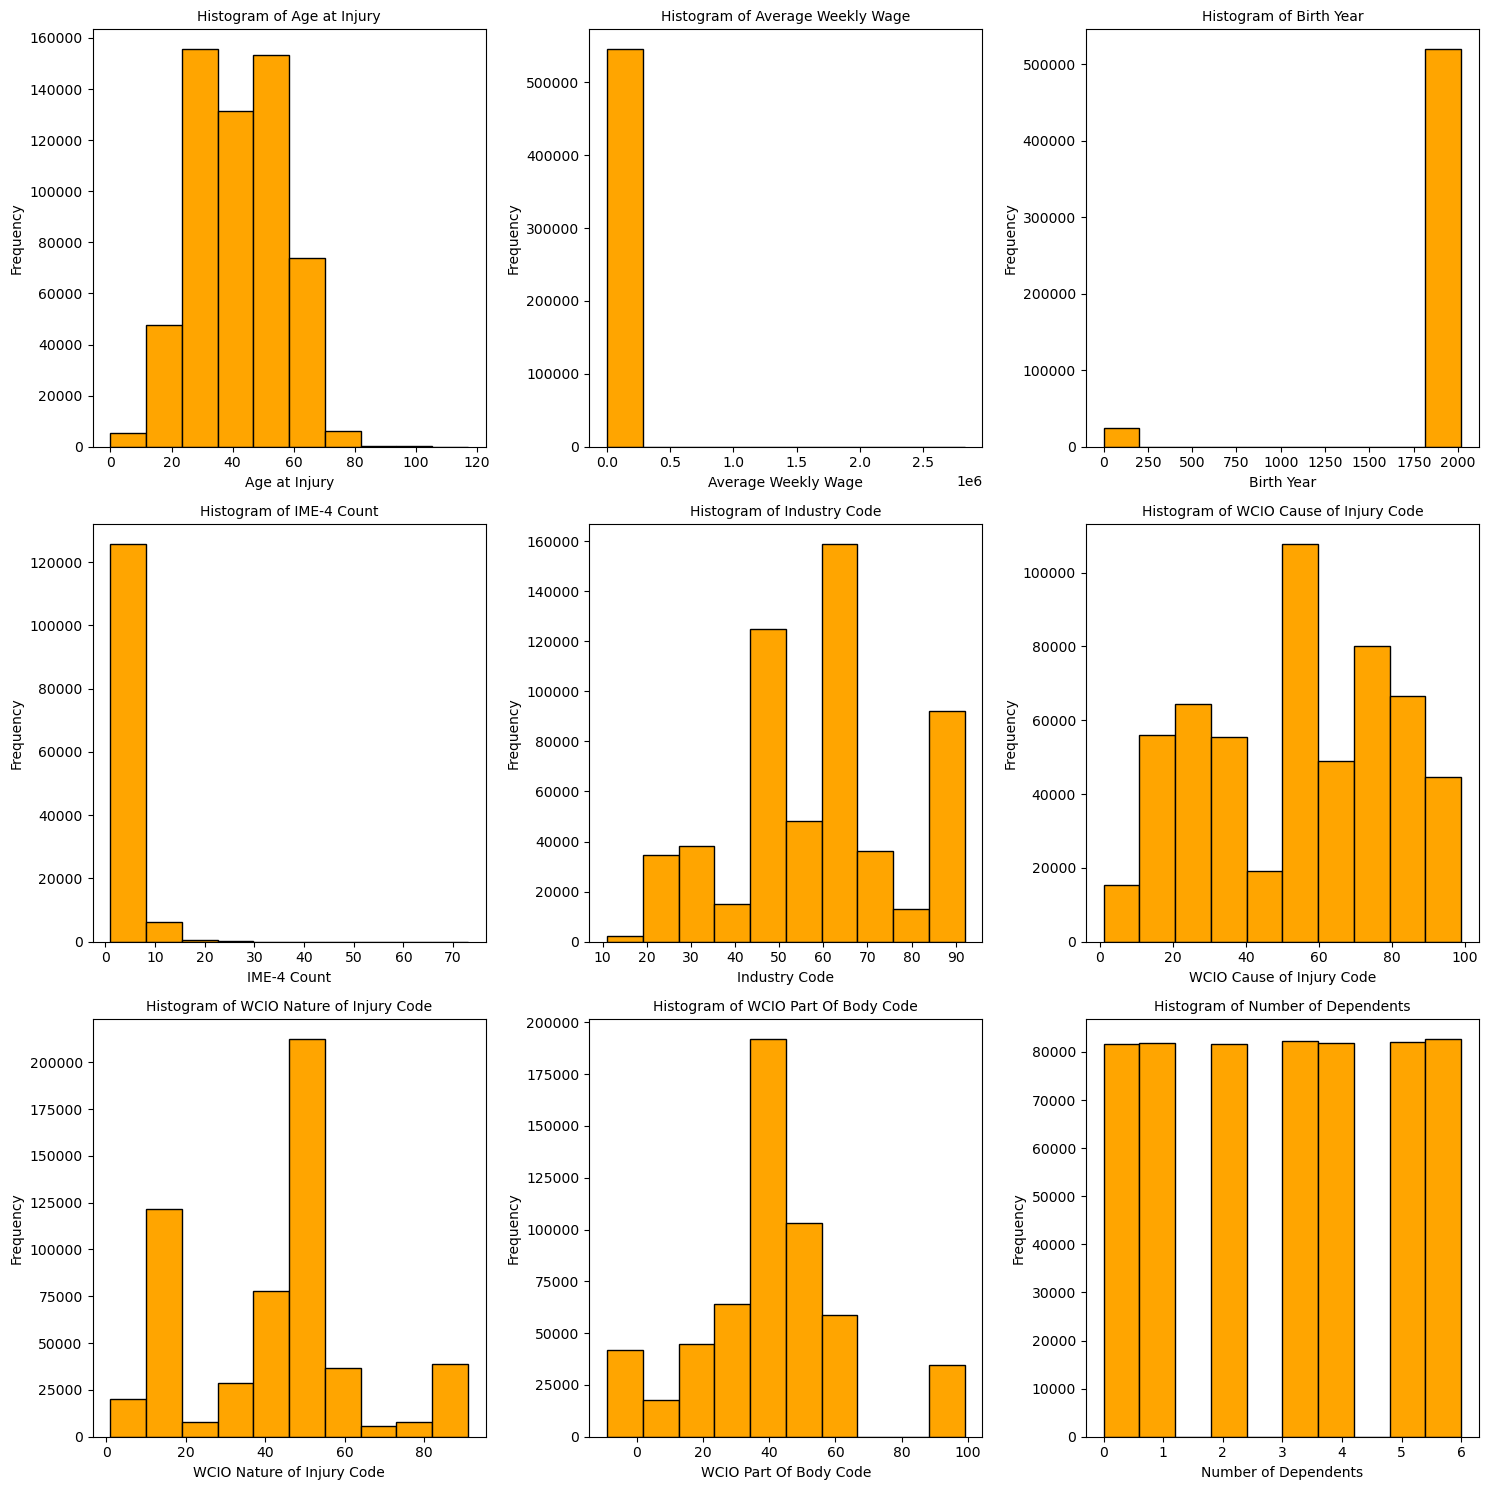

In [10]:
v.plot_numeric_histograms(df)

**Age at Injury**

In [113]:
print(df['Age at Injury'].describe())
print()
print(test['Age at Injury'].describe())

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

count    387975.000000
mean         41.414944
std          14.501056
min           0.000000
25%          30.000000
50%          40.000000
75%          53.000000
max         114.000000
Name: Age at Injury, dtype: float64


Set an treshold for age threshold for <80

In [18]:
# len(df[df['Age at Injury'] <= 80]) / len_df

1.0

In [19]:
df = df[df['Age at Injury'] <= 80]

**Average Weekly Wage**

In [116]:
print(df['Average Weekly Wage'].describe())
print()
print(test['Average Weekly Wage'].describe())

count    5.446130e+05
mean     4.914376e+02
std      6.096970e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.419800e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

count    3.687710e+05
mean     1.833438e+02
std      3.542310e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.950317e+06
Name: Average Weekly Wage, dtype: float64


**Birth Year**

In [20]:
# len(df[~((df['Birth Year'] == 0) & ((df['Claim Injury Type'].str.contains('2')) | (df['Claim Injury Type'].str.contains('4'))))]) / len_df

0.9659616038797352

In [21]:
# df = df[~((df['Birth Year'] == 0) & ((df['Claim Injury Type'].str.contains('2')) | (df['Claim Injury Type'].str.contains('4'))))]

**IME-4 Count**

In [119]:
df['IME-4 Count'].value_counts()

IME-4 Count
1.0     39296
2.0     33712
3.0     15713
4.0     13405
5.0      7465
6.0      6216
7.0      3739
8.0      3058
9.0      1844
10.0     1416
11.0      977
12.0      782
13.0      492
14.0      381
15.0      267
16.0      210
18.0      138
17.0      119
19.0       77
20.0       53
21.0       53
22.0       34
23.0       17
24.0       16
27.0       14
25.0        7
26.0        6
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

In [22]:
# len(df[(df['IME-4 Count'] <= 24) | (df['IME-4 Count'].isna())]) / len_df

0.9658534457944822

In [23]:
# df = df[(df['IME-4 Count'] <= 24) | (df['IME-4 Count'].isna())]

**Number of Dependents**

In [24]:
df['Number of Dependents'].describe()

count    553661.000000
mean          3.006045
std           2.001103
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64

Check the size of DF before continuing

In [39]:
len(df) / len_df

1.0

As it can be seen bellow, most removed observations were taken from the top 2 classes with most observations, keeping other classes almost intact.

For the code variables, their descriptions will be addressed in the next section.

In [124]:
copy_df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [125]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        276888
4. TEMPORARY       142497
3. MED ONLY         68827
5. PPD SCH LOSS     48242
1. CANCELLED        12455
6. PPD NSL           4200
8. DEATH              455
7. PTD                 97
Name: count, dtype: int64

### Categorical Variables

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

AS Y an N categories have very few values, we may consider dropping them. However, we must explore its relation with other features first

In [126]:
df['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    551215
Y      2441
U         5
Name: count, dtype: int64

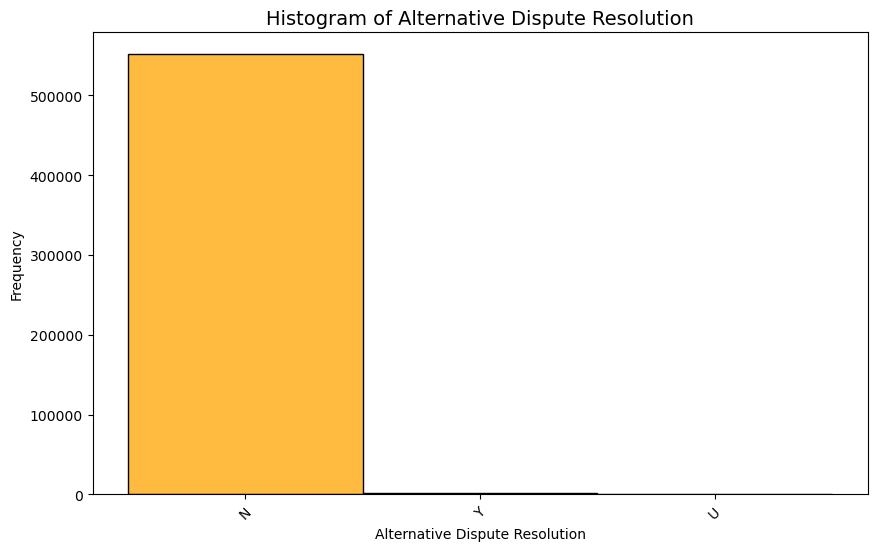

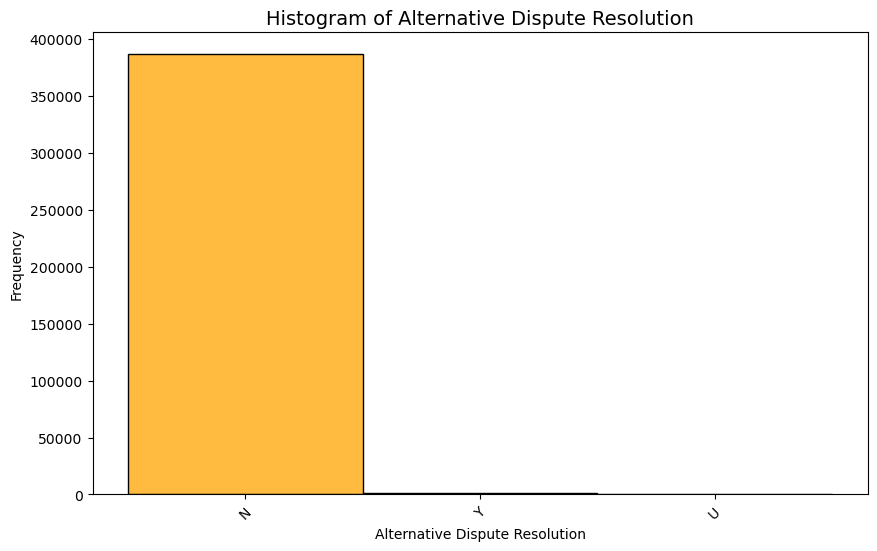

In [44]:
v.plot_histogram(df, 'Alternative Dispute Resolution')

v.plot_histogram(test, 'Alternative Dispute Resolution')

**Attorney/Representative**

In [45]:
df['Attorney/Representative'].value_counts()

Attorney/Representative
N    376902
Y    176759
Name: count, dtype: int64

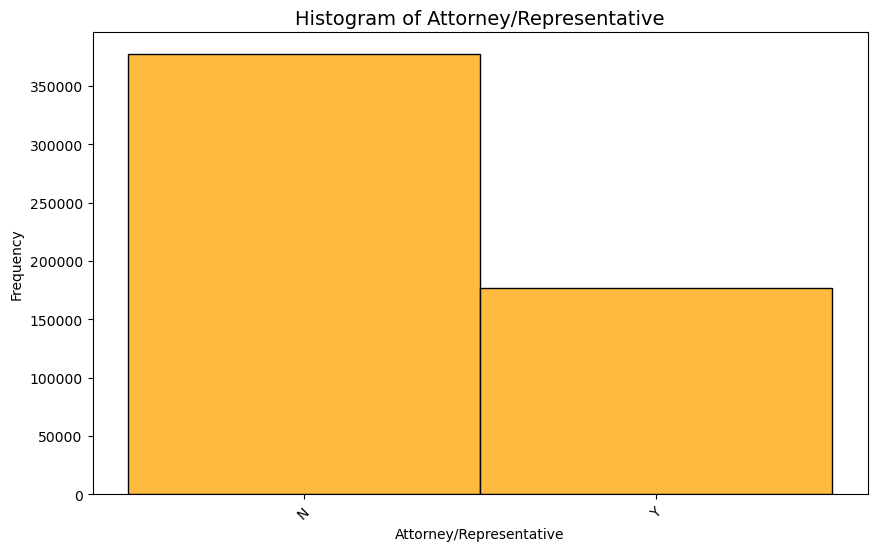

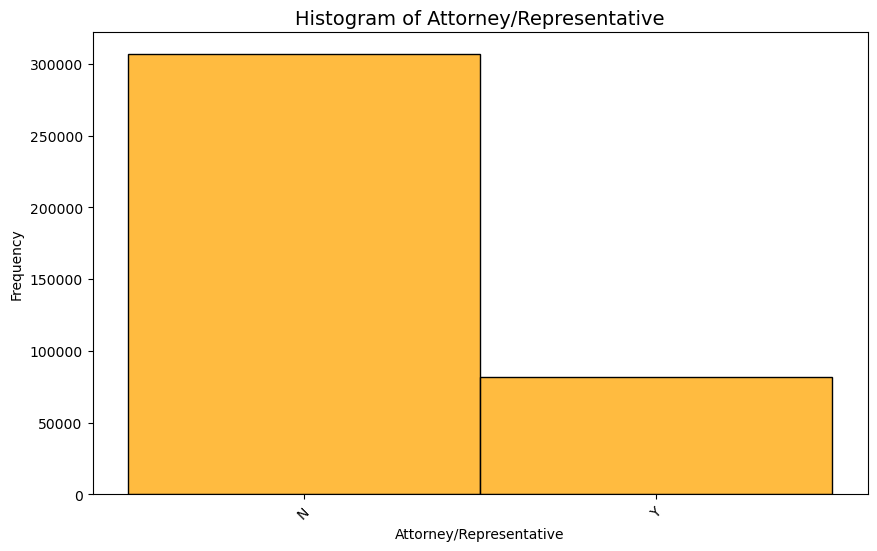

In [27]:
v.plot_histogram(df, 'Attorney/Representative')

v.plot_histogram(test, 'Attorney/Representative')

**Carrier Name**

In [28]:
freq = df['Carrier Name'].value_counts()
freq

Carrier Name
STATE INSURANCE FUND             107669
POLICE, FIRE, SANITATION          21424
AMERICAN ZURICH INSURANCE CO      16950
CHARTER OAK FIRE INS CO           16593
INDEMNITY INS. OF N AMERICA       13761
                                  ...  
GREAT AMERICAN SPIRIT INS. CO         1
GOLUB CORP                            1
ARGYLE CENTRAL SCHOOL DIST            1
ASSURANCE COMPANY OF AMERICA          1
HERMON-DEKALB CENTRAL                 1
Name: count, Length: 2030, dtype: int64

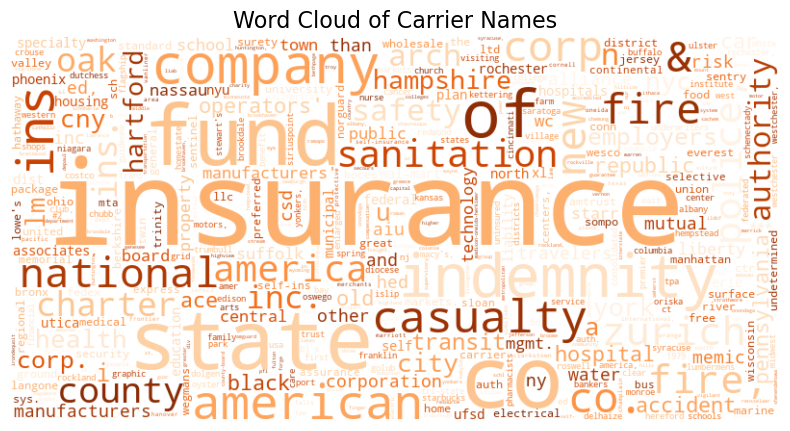

In [133]:
v.generate_wordcloud(df, column_name='Carrier Name', 
                   title='Word Cloud of Carrier Names')

**Carrier Type**

As we previously identified, there are 2 categories present in DF (5A, 5C) that do not exist in test. This can be confirmed by the 2 visualisations bellow

In [30]:
df['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    273423
3A. SELF PUBLIC                                118955
2A. SIF                                        107669
4A. SELF PRIVATE                                51080
UNKNOWN                                          1589
5D. SPECIAL FUND - UNKNOWN                        937
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          4
Name: count, dtype: int64

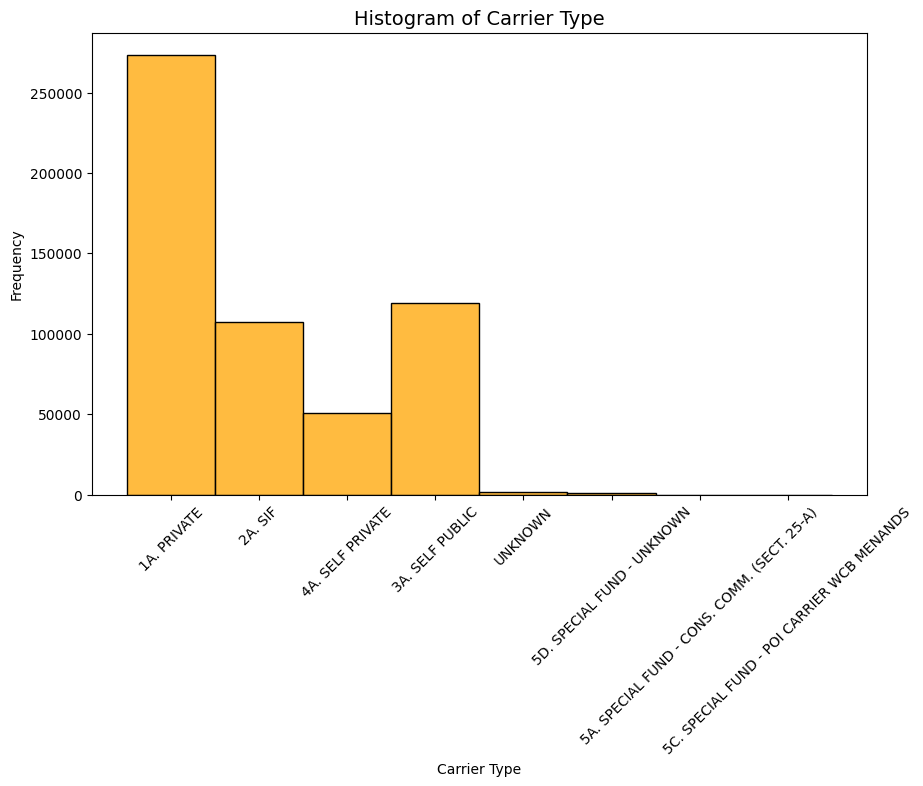

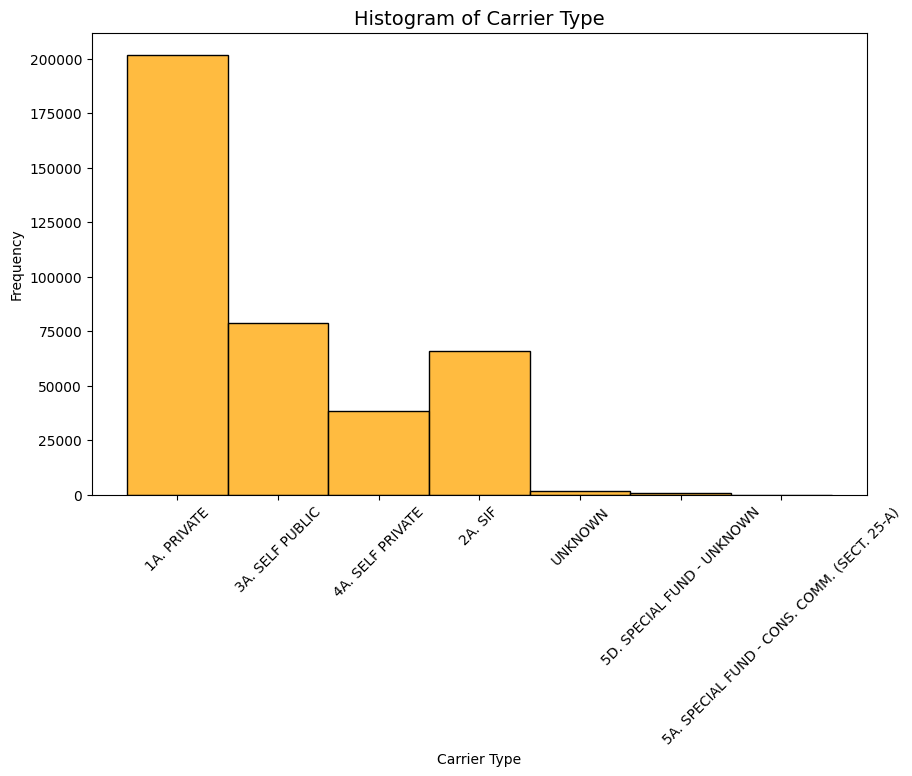

In [25]:
v.plot_histogram(df, 'Carrier Type')

v.plot_histogram(test, 'Carrier Type')

**County of Injury**

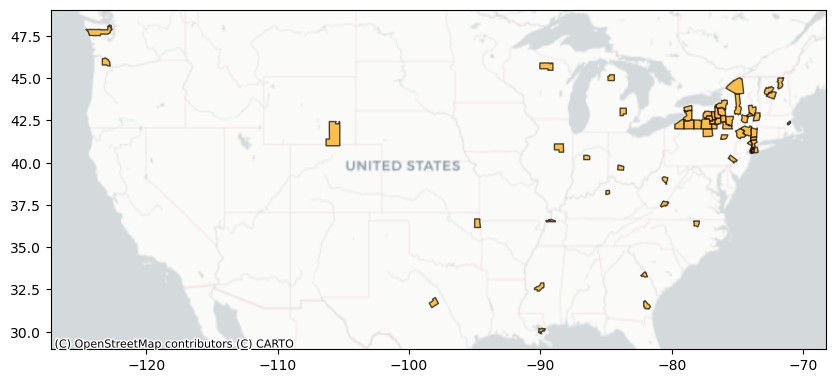

In [26]:
map_.map_('./geojson-counties-fips.json', df)

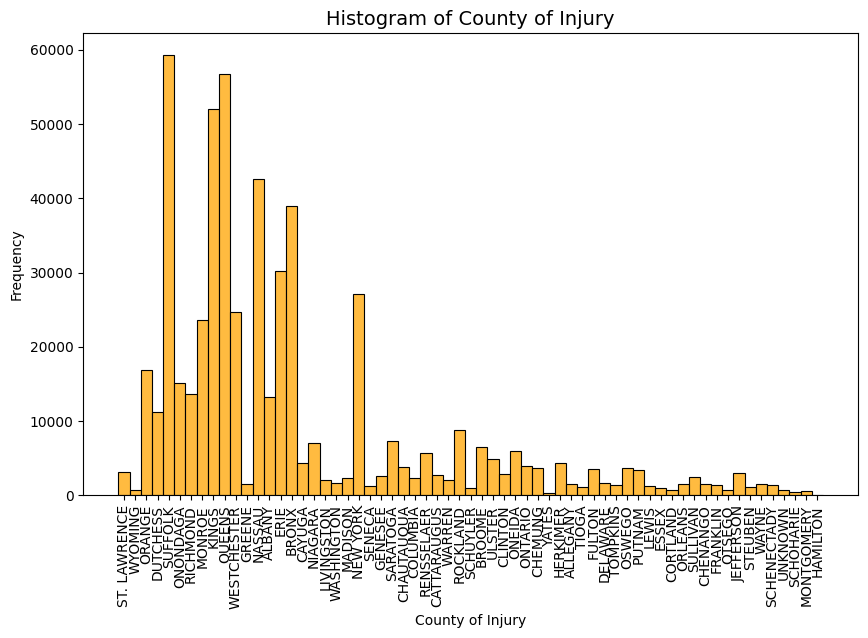

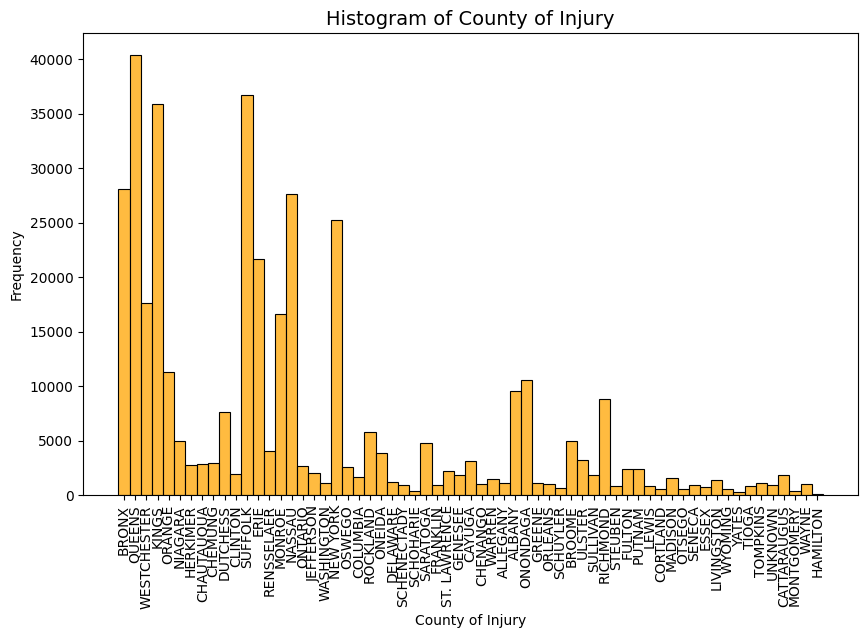

In [30]:
v.plot_histogram(df, 'County of Injury',
                 rotation = 90)

v.plot_histogram(test, 'County of Injury',
                 rotation = 90)

**COVID-19 Indicator**

In [37]:
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    527209
Y     26452
Name: count, dtype: int64

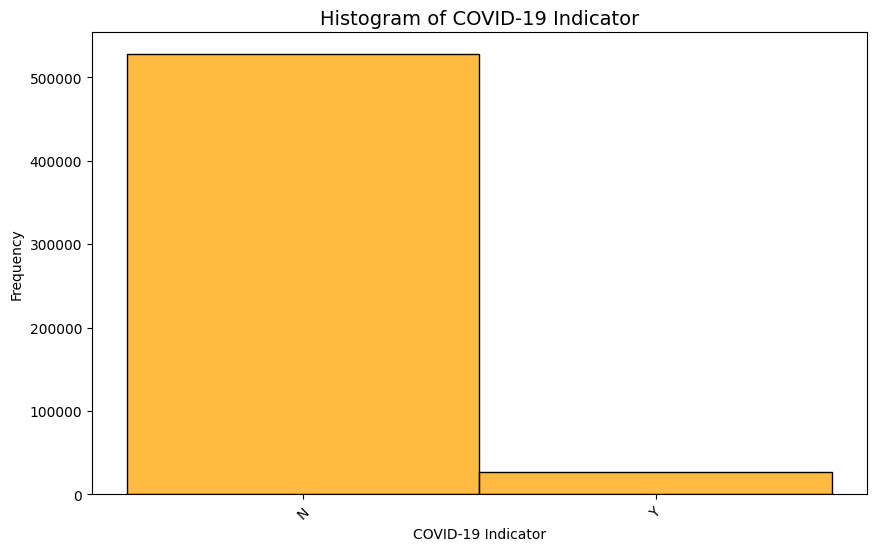

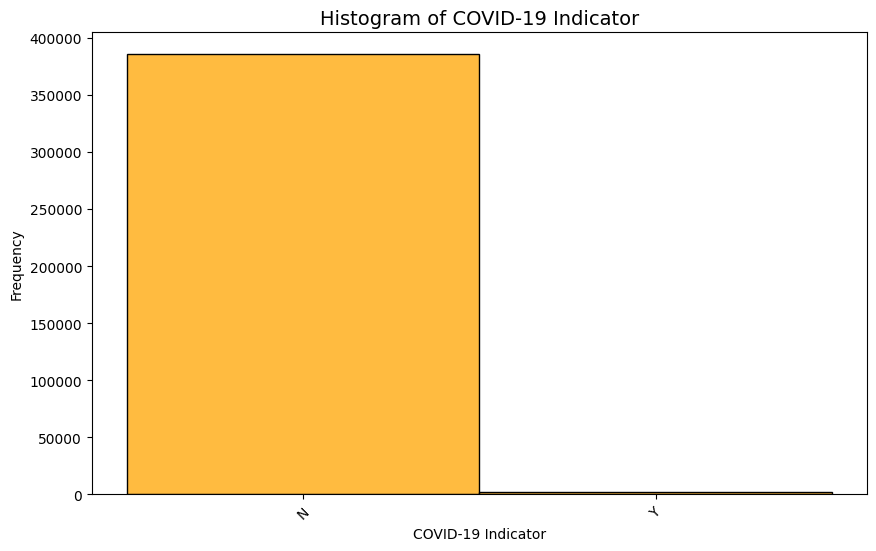

In [38]:
v.plot_histogram(df, 'COVID-19 Indicator')

v.plot_histogram(test, 'COVID-19 Indicator')

**District Name**

In [33]:
df['District Name'].value_counts()

District Name
NYC           261406
ALBANY         82516
HAUPPAUGE      59382
BUFFALO        44307
SYRACUSE       43001
ROCHESTER      39019
BINGHAMTON     20267
STATEWIDE       3763
Name: count, dtype: int64

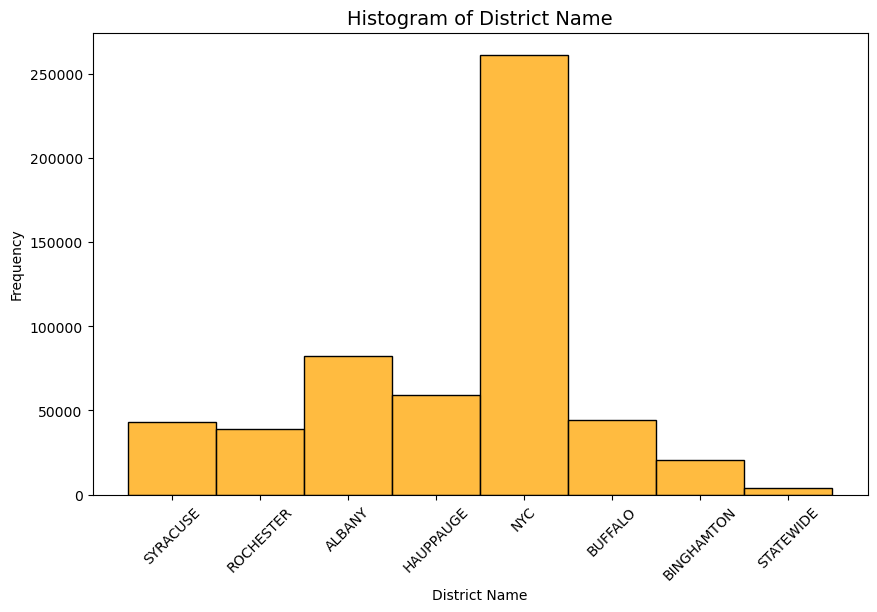

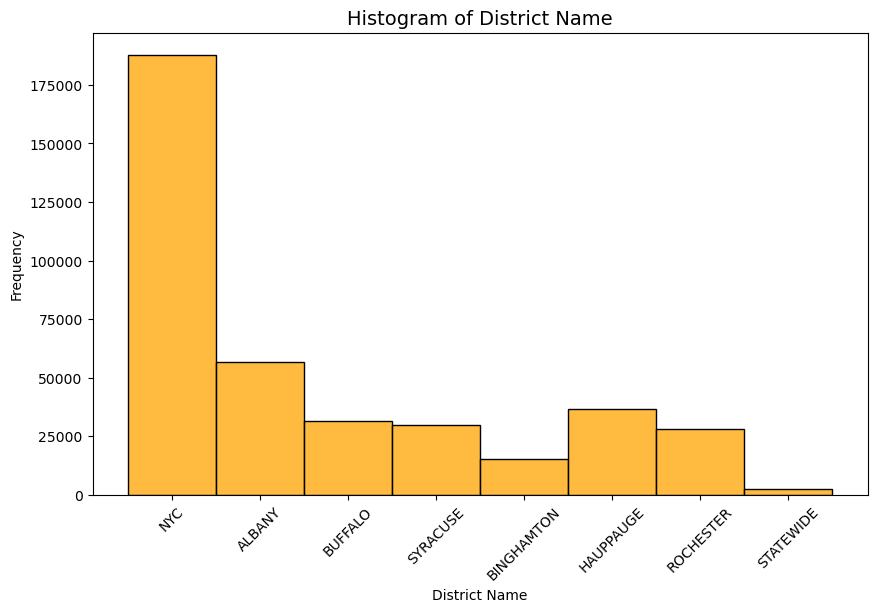

In [34]:
v.plot_histogram(df, 'District Name')

v.plot_histogram(test, 'District Name')

**Gender**

In [ ]:
df['Gender'].value_counts()

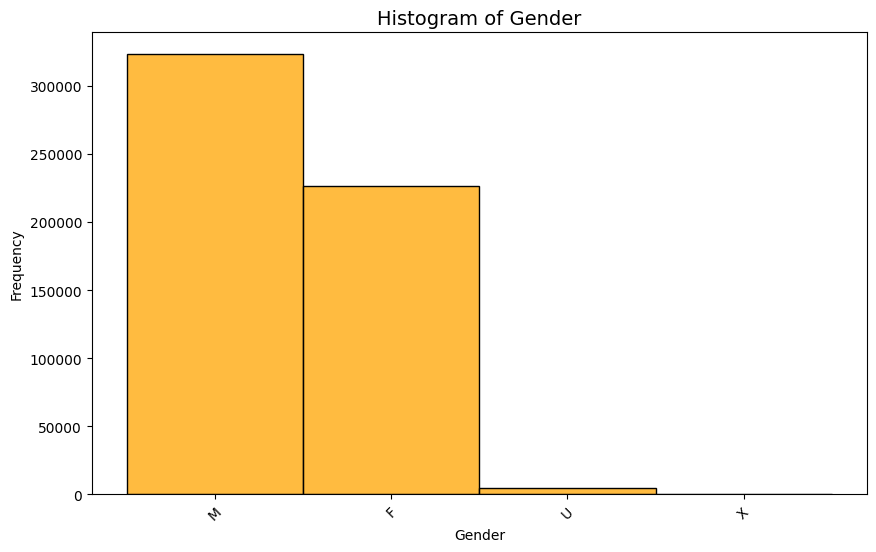

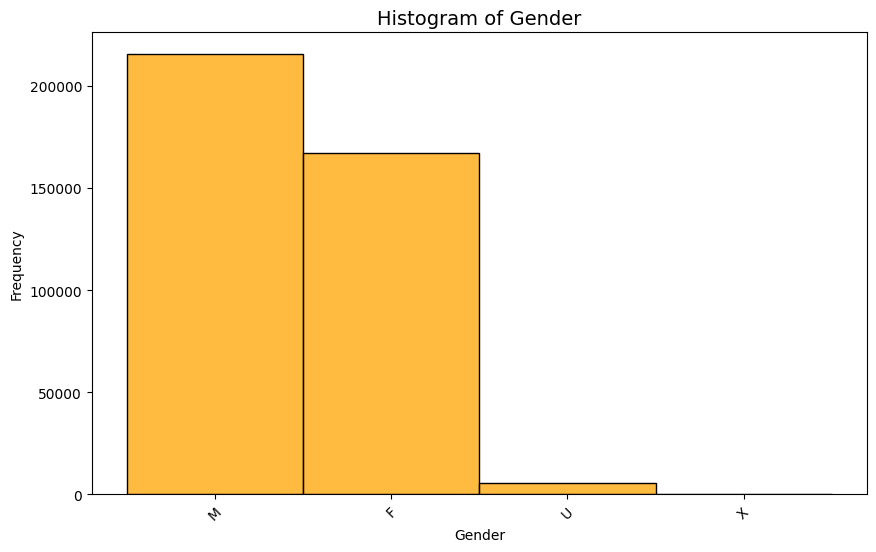

In [39]:
v.plot_histogram(df, 'Gender')

v.plot_histogram(test, 'Gender')

**Industry Code Description**

In [37]:
df['Industry Code Description'].value_counts()

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               110870
PUBLIC ADMINISTRATION                                            90229
RETAIL TRADE                                                     59728
TRANSPORTATION AND WAREHOUSING                                   51740
EDUCATIONAL SERVICES                                             42969
MANUFACTURING                                                    36709
CONSTRUCTION                                                     29626
ACCOMMODATION AND FOOD SERVICES                                  25539
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     20122
WHOLESALE TRADE                                                  14702
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    12642
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9262
ARTS, ENTERTAINMENT, AND RECREATION                               8996
REAL ESTATE AND RENTAL AND LEASING                 

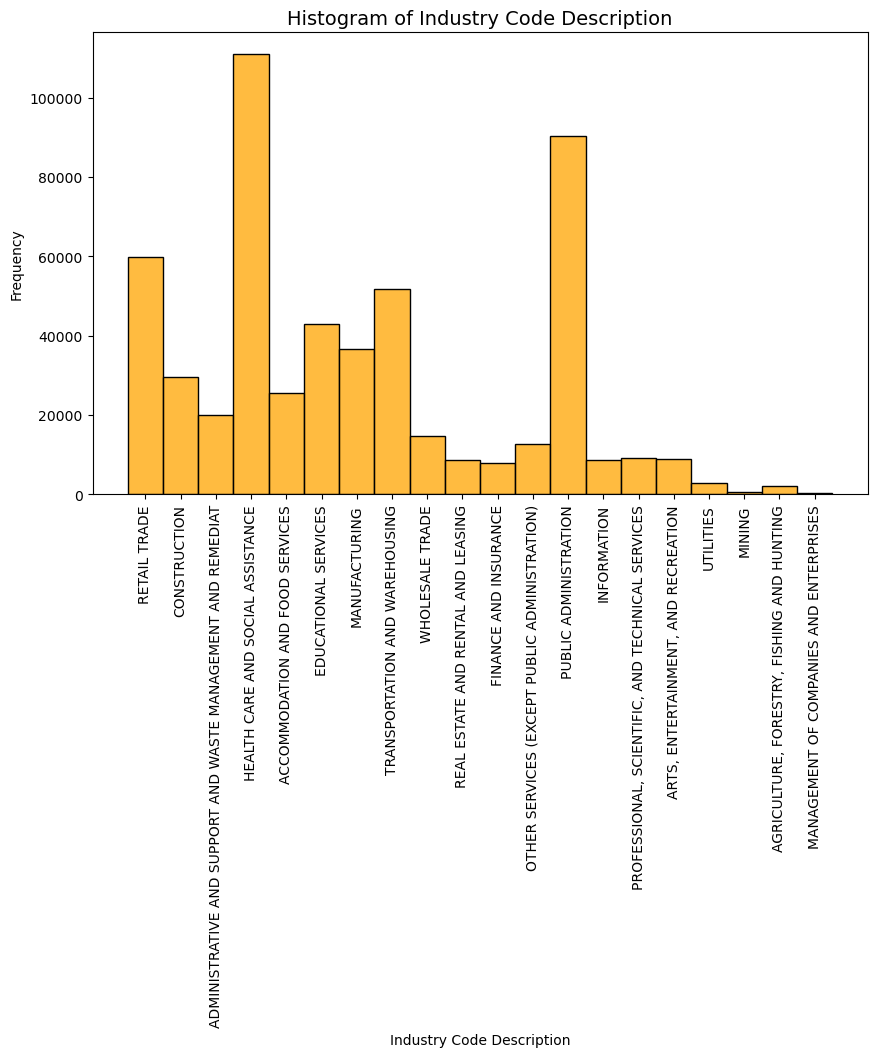

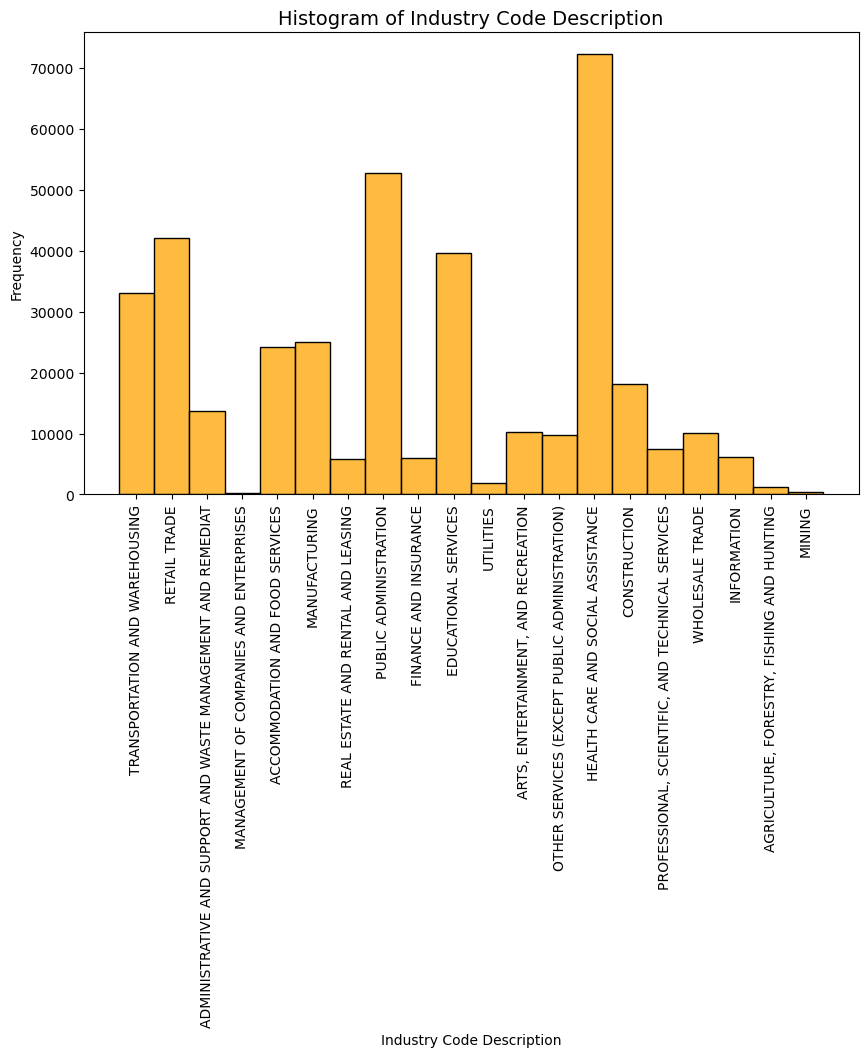

In [39]:
v.plot_histogram(df, 'Industry Code Description',
                rotation = 90)

v.plot_histogram(test, 'Industry Code Description',
                rotation = 90)

**Medical Fee Region**

In [35]:
df['Medical Fee Region'].value_counts()

Medical Fee Region
IV     264398
I      130727
II      84173
III     52741
UK      21622
Name: count, dtype: int64

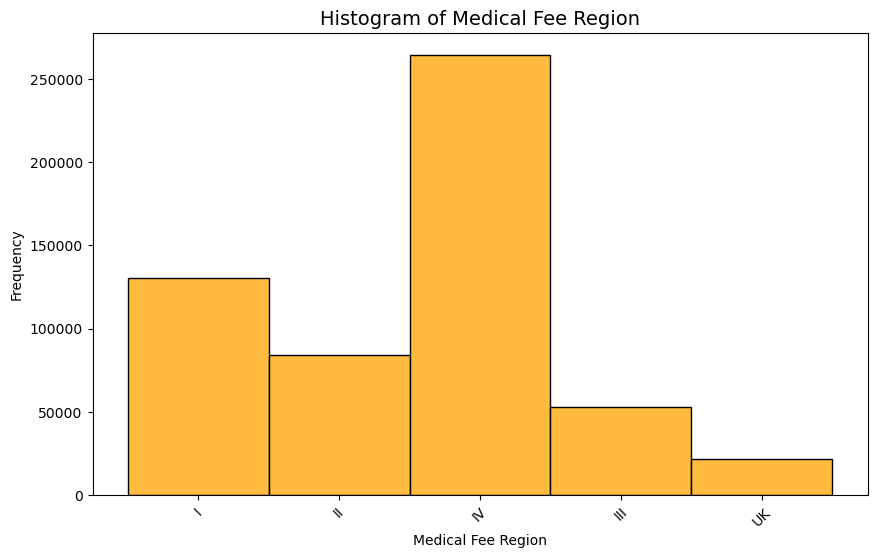

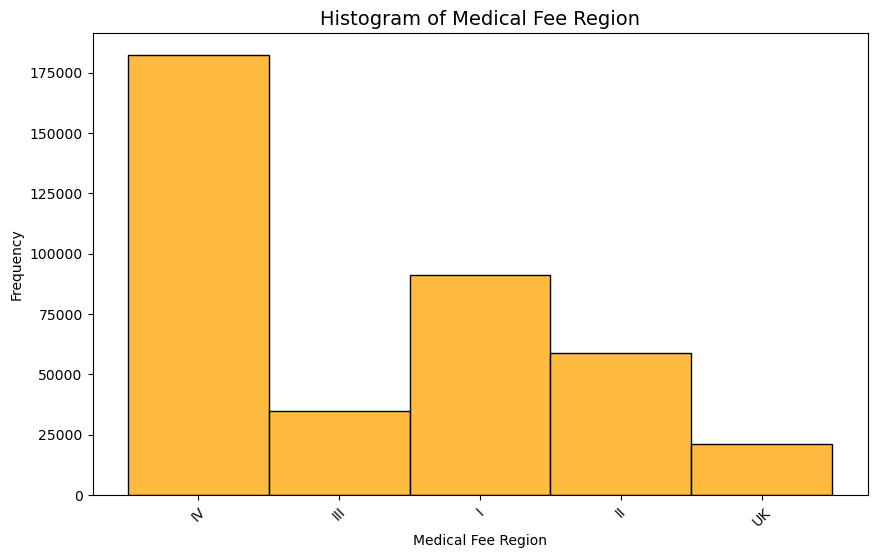

In [36]:
v.plot_histogram(df, 'Medical Fee Region')

v.plot_histogram(test, 'Medical Fee Region')

**WCIO Cause of Injury Description**

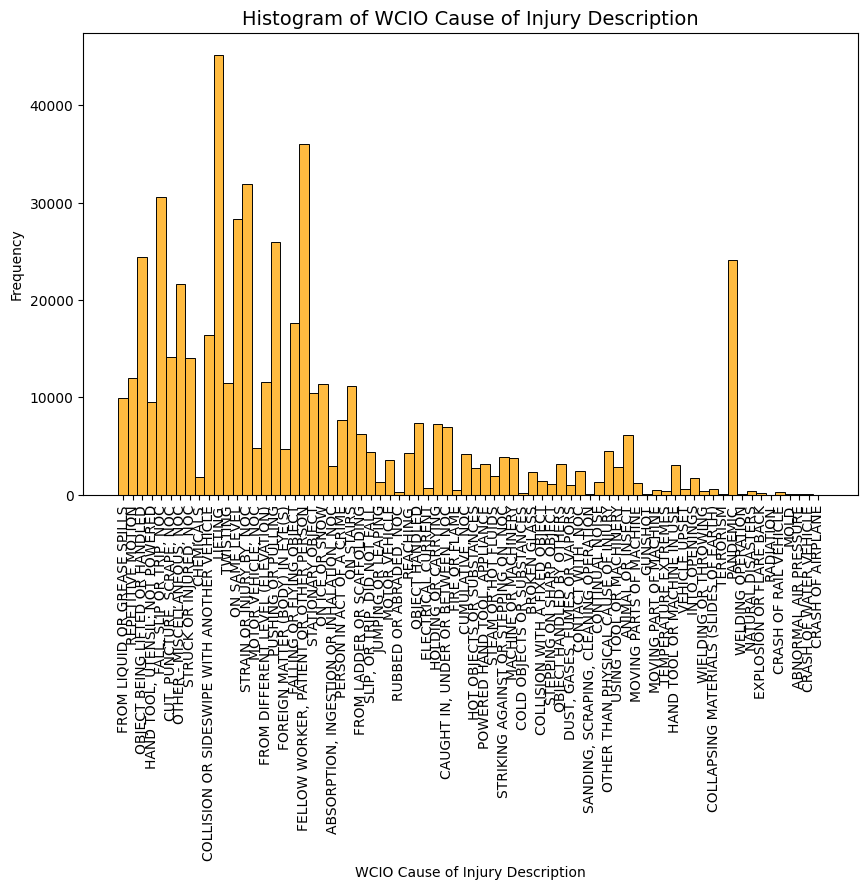

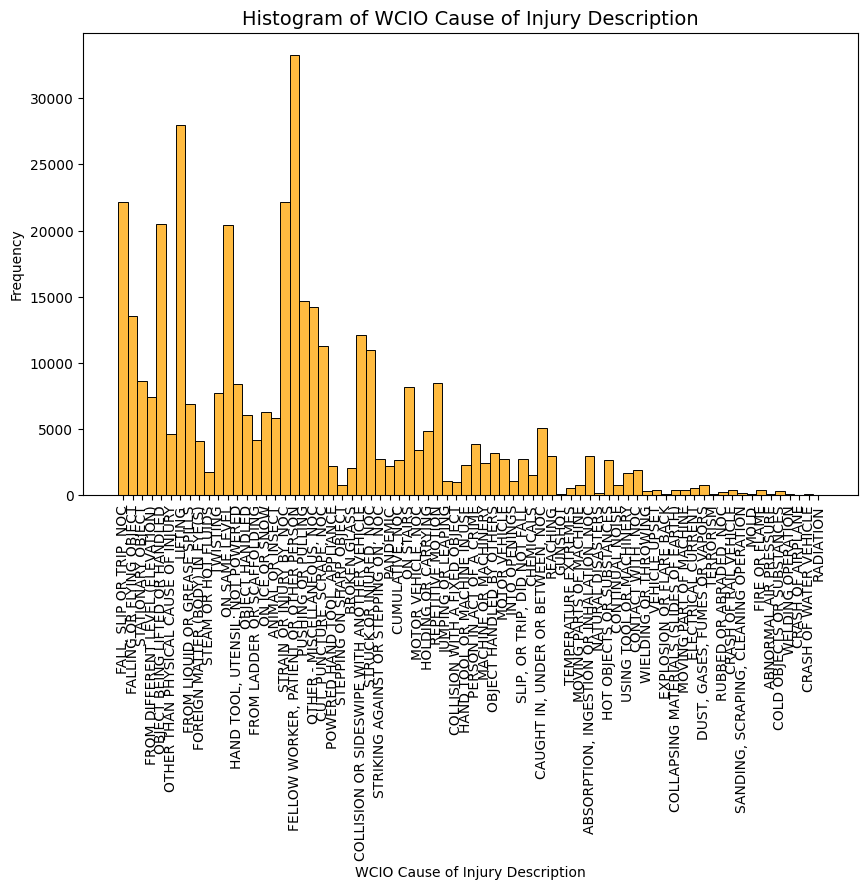

In [40]:
v.plot_histogram(df, 'WCIO Cause of Injury Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Cause of Injury Description', 
                          rotation = 90)

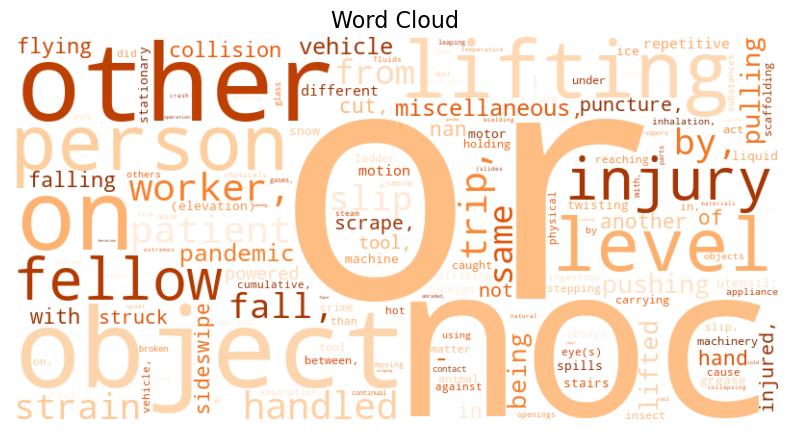

In [26]:
v.generate_wordcloud(df, 'WCIO Cause of Injury Description')

**WCIO Nature of Injury Description**

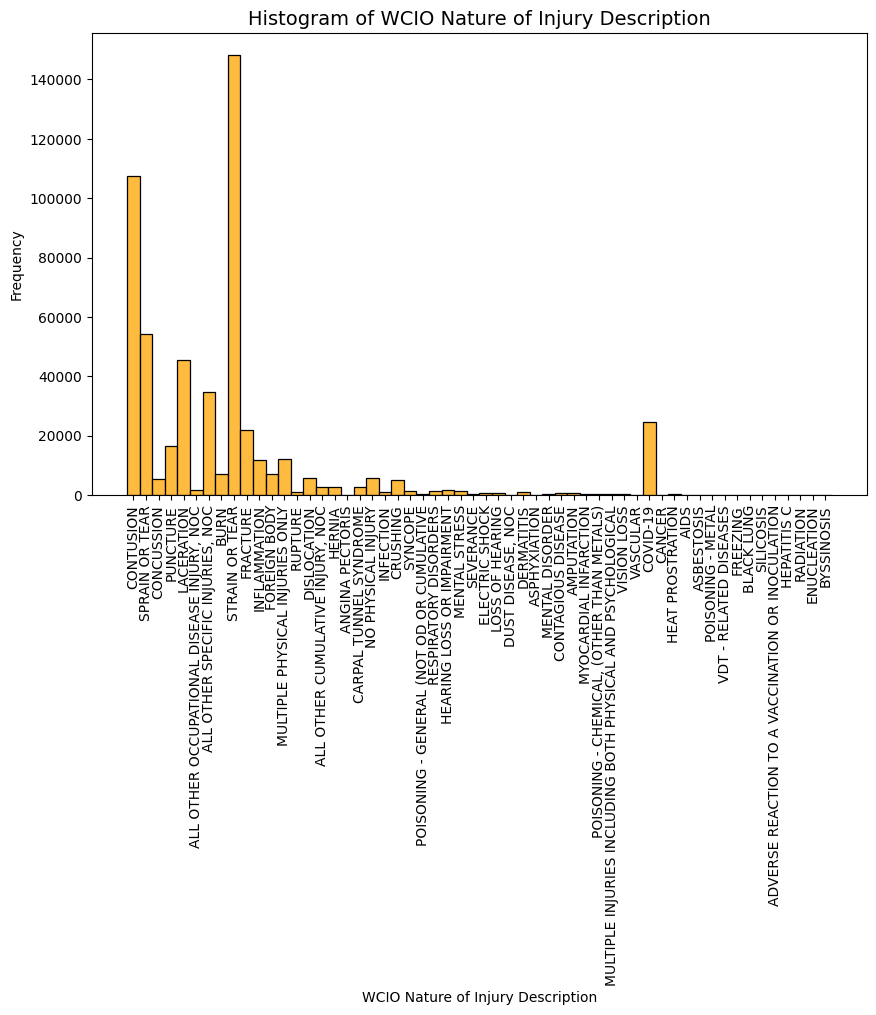

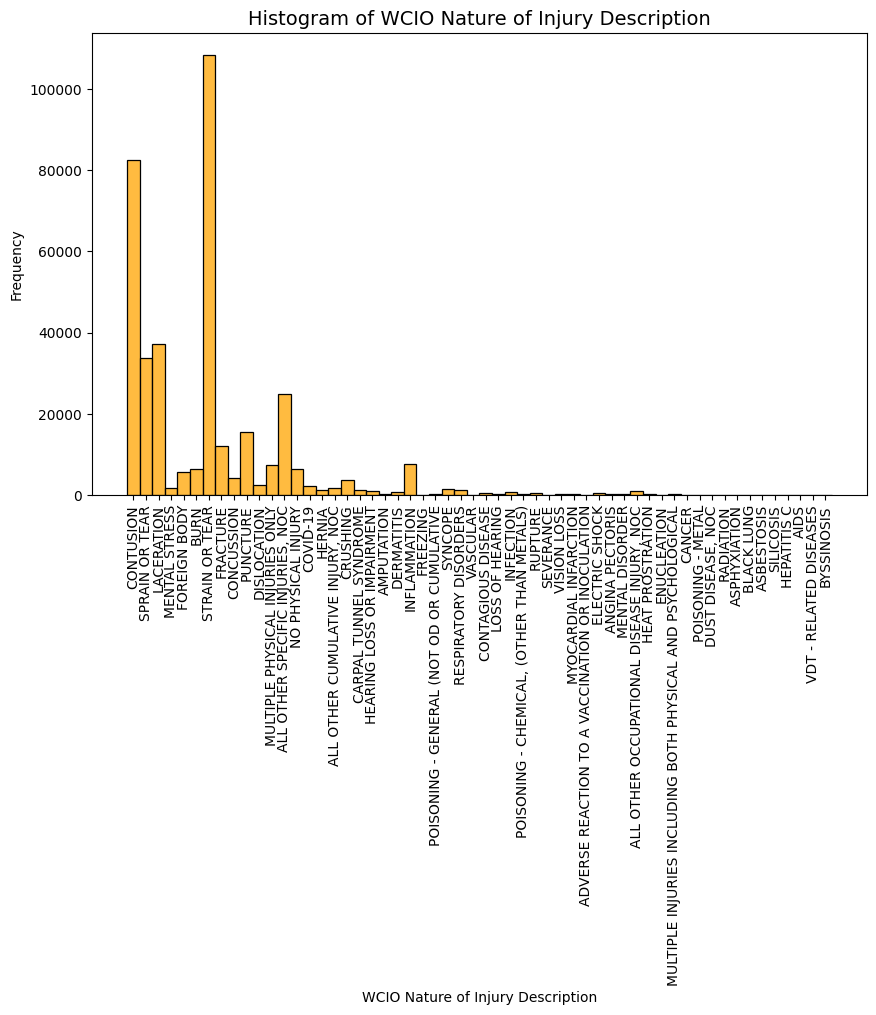

In [41]:
v.plot_histogram(df, 'WCIO Nature of Injury Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Nature of Injury Description', 
                          rotation = 90)

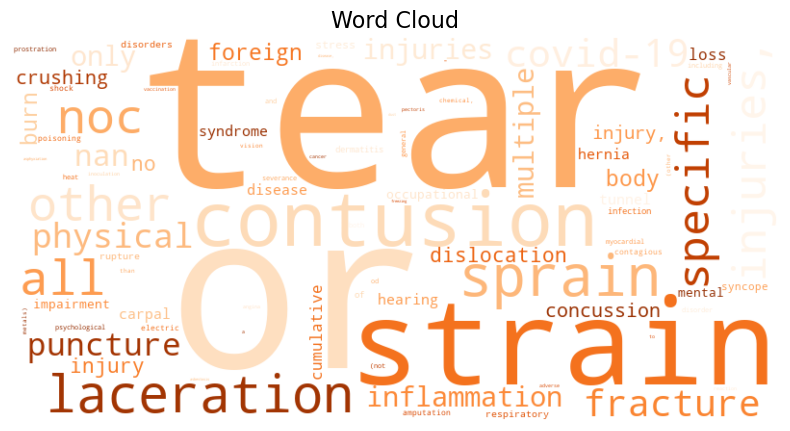

In [27]:
v.generate_wordcloud(df, 'WCIO Nature of Injury Description')

**WCIO Part Of Body Description**

In DF, even though teh category 'Multiple' is still common, there are 2 categories that are even more common ('Lower Back Area' and 'Knee'), when comparing to the test data.

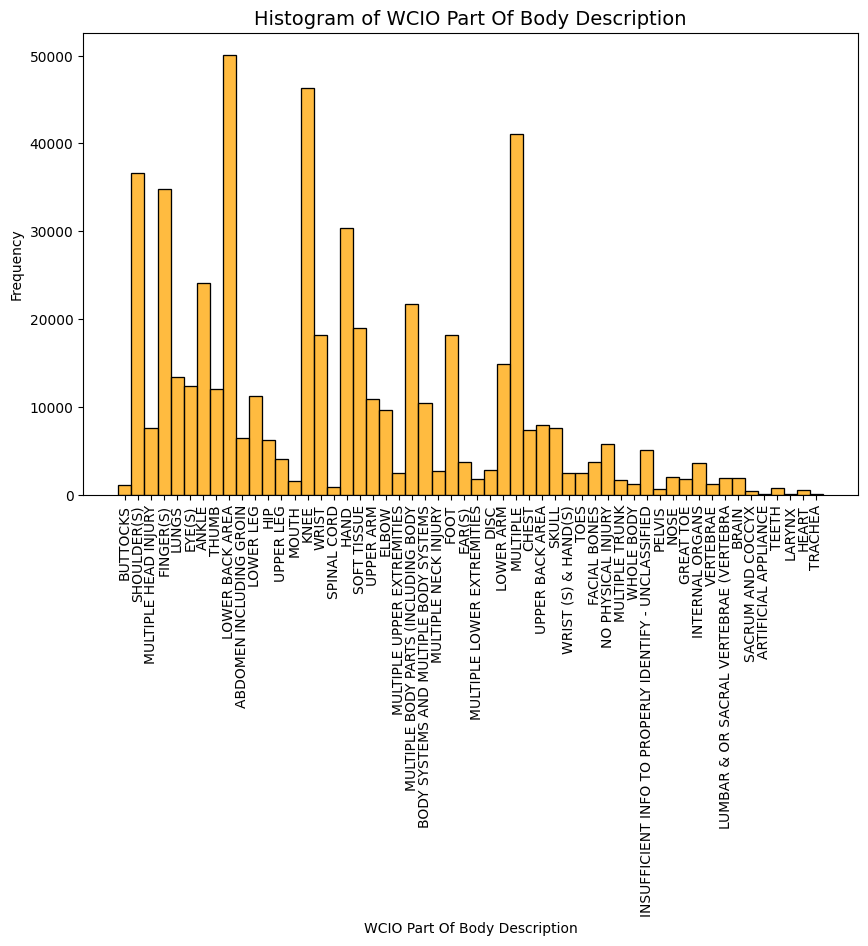

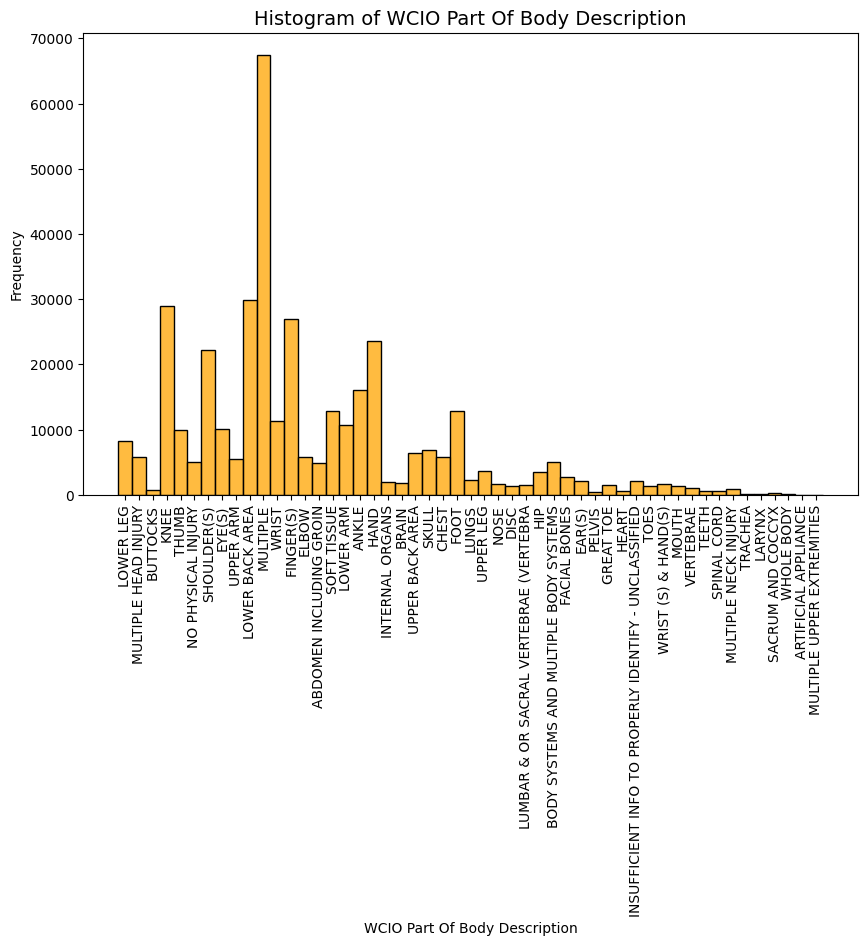

In [192]:
v.plot_histogram(df, 'WCIO Part Of Body Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Part Of Body Description', 
                          rotation = 90)

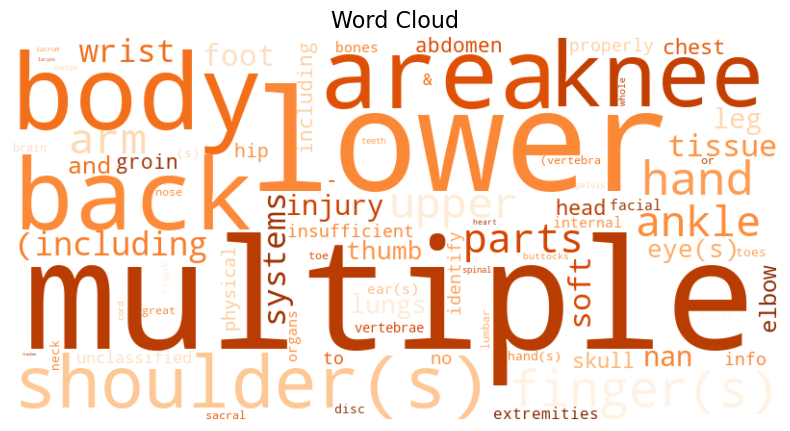

In [28]:
v.generate_wordcloud(df, 'WCIO Part Of Body Description')

**Zip Code**

In [42]:
df['Zip Code'].value_counts()

Zip Code
11236    3298
10940    2963
11717    2798
11434    2748
11706    2718
         ... 
17512       1
90026       1
38017       1
89015       1
90241       1
Name: count, Length: 6170, dtype: int64

### 2.1.2 Bivariate Analysis

<a href="#top">Top &#129033;</a>

### Numerical vs Numerical

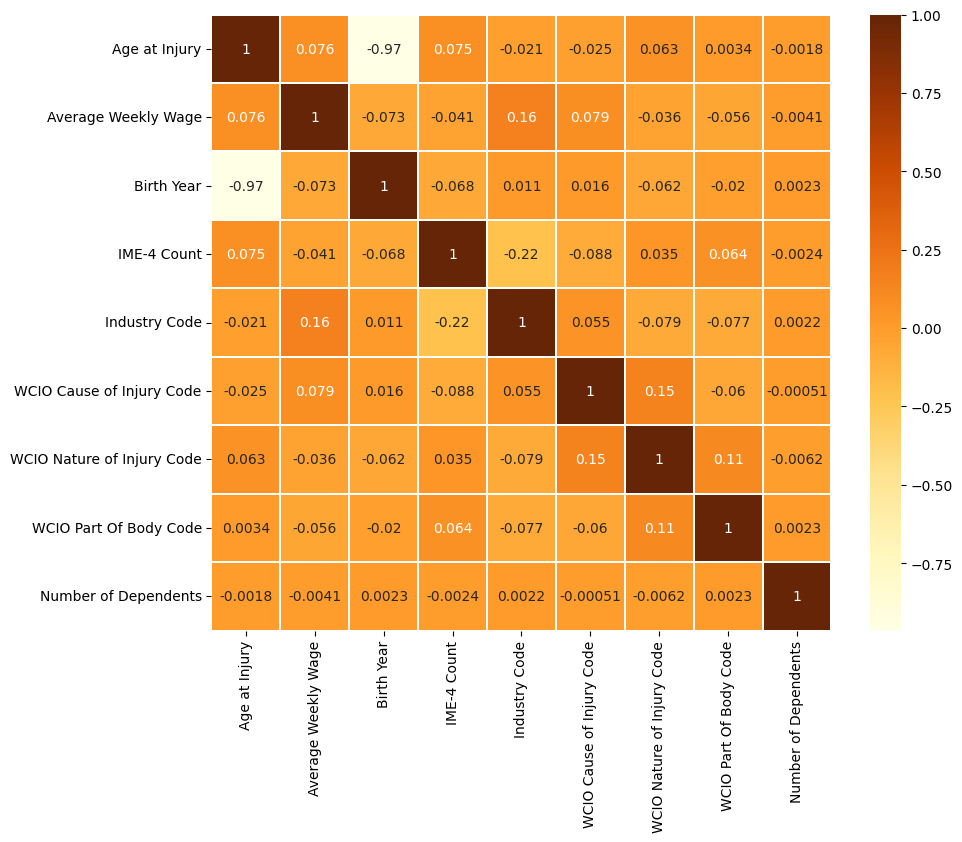

In [27]:
# Remove rows with missing values
temp = df.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1)
plt.show()

From plotting a correlation matrix for numeric features, we can conclude that there are no highly positive correlations. Nonetheless, there is a highly negative correlation (-0.97) between **Birth Year** and **Age at Injury**. 

This negative correlation was to be expected, as the age can be computed from the birth year, and the higher the birth year, the lower the age.

This problem will be addressed later in the project.

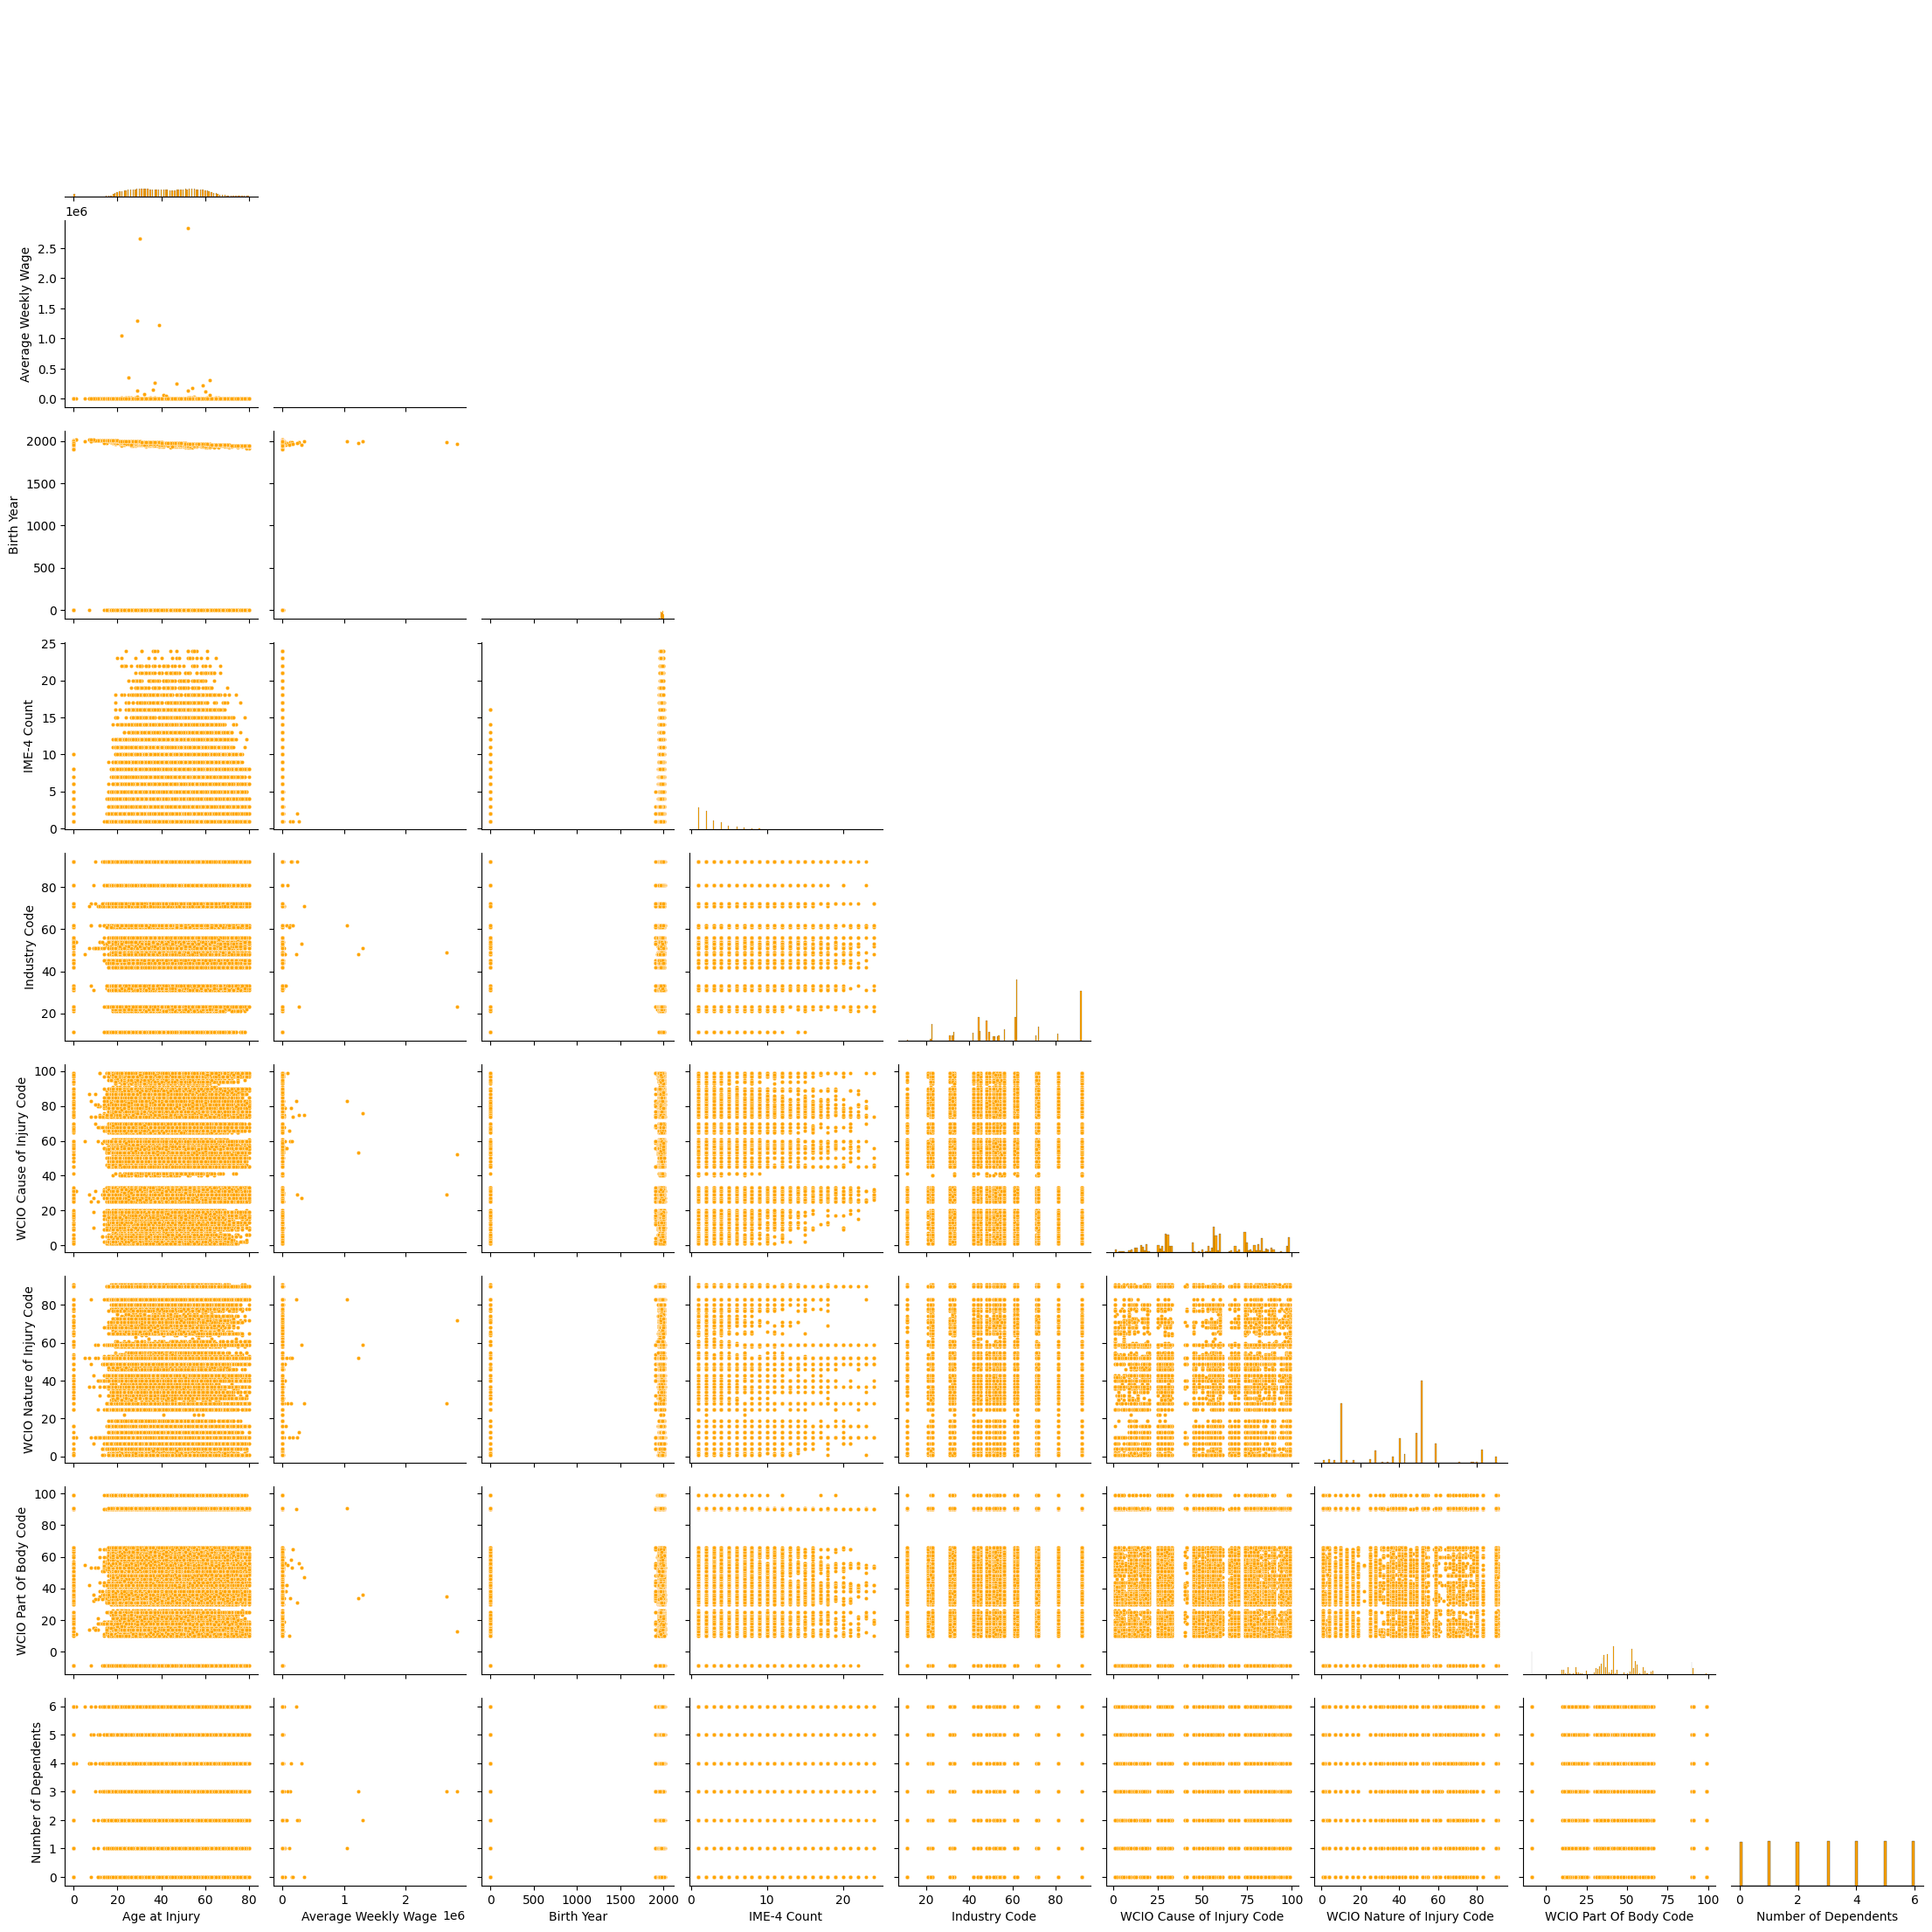

In [29]:
v.plot_pairwise_relationship(df)

Above we are plotting scatterplots for all combinations of numeric variables, looking for linear relationships between them. Since this matrix is mirrored on the diagonal, we decided to only display half of it.

This allowed us to conclude that there are no linear relationships when combining two numeric variables.

### Numerical vs Categorical

<a href="#top">Top &#129033;</a>

In [56]:
discrete = ['Birth Year', 'IME-4 Count', 'Industry Code',
            'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
            'WCIO Part Of Body Code', 'Number of Dependents']

continuous = ['Age at Injury', 'Average Weekly Wage']

categorical = [col for col in df.select_dtypes(include=['object']).columns
               if df[col].nunique() < 9]

#### Categorical vs Numerical Discrete

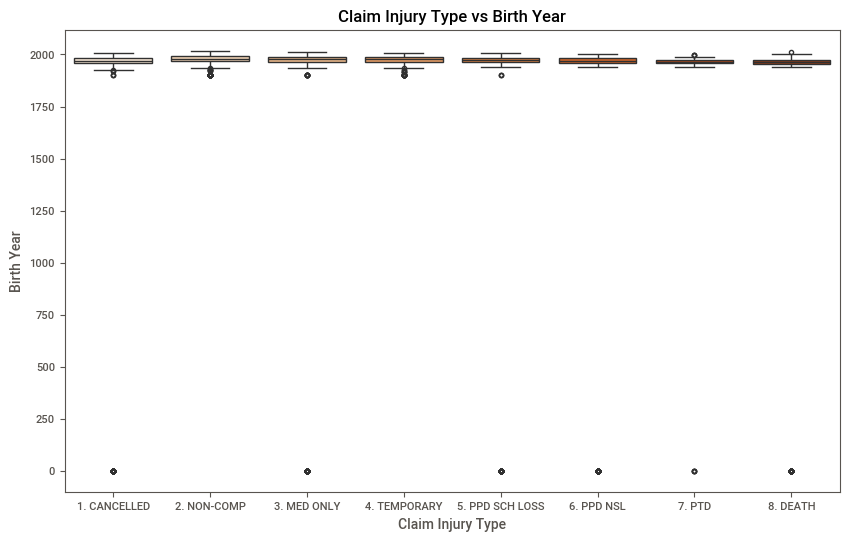

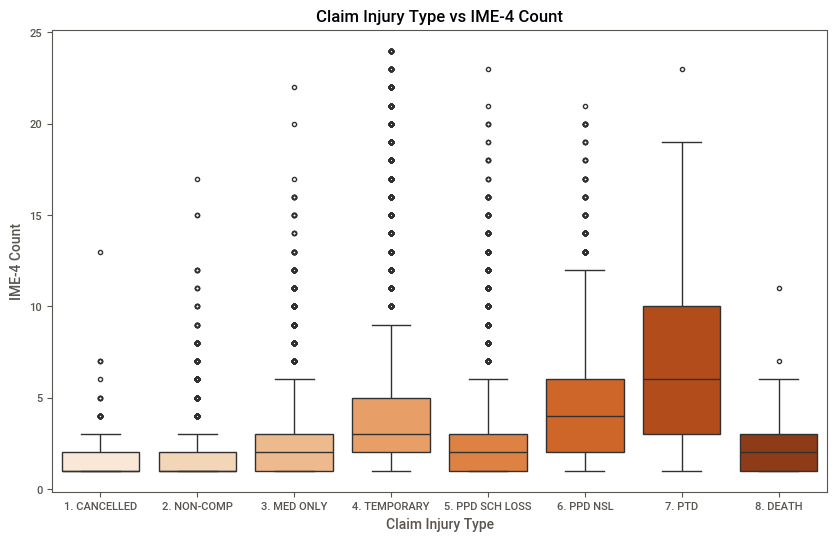

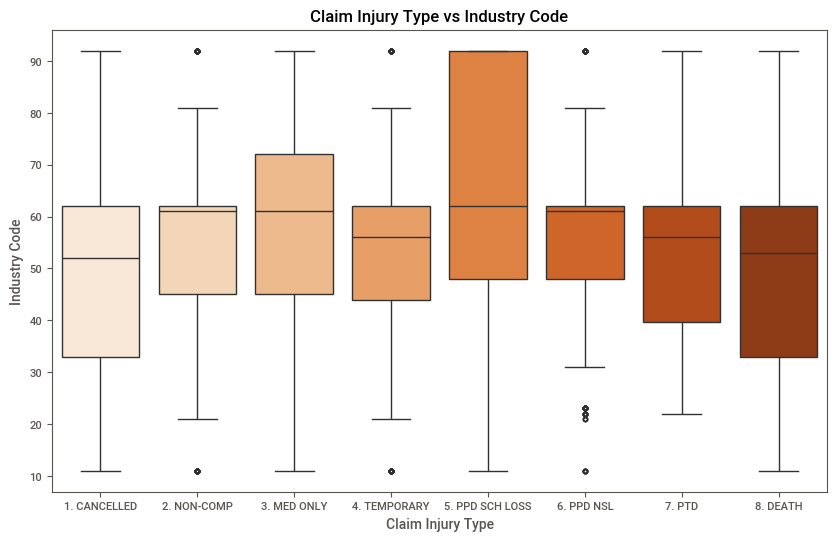

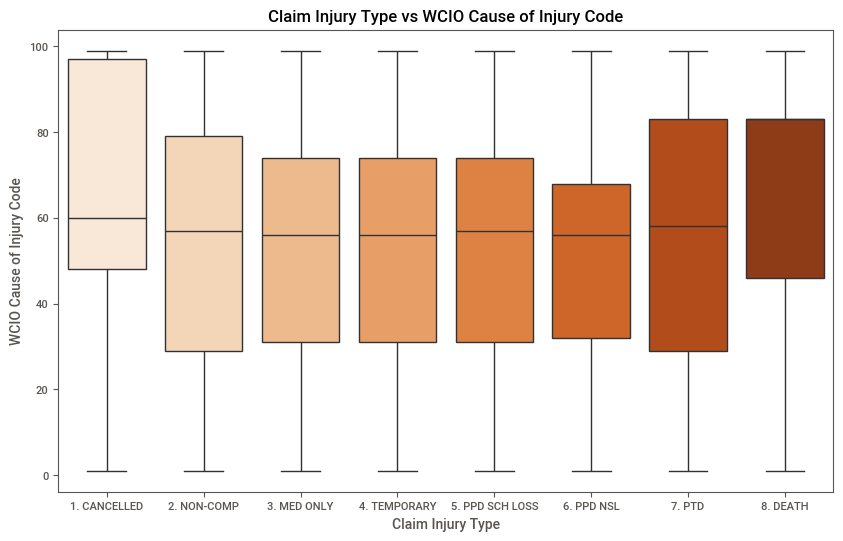

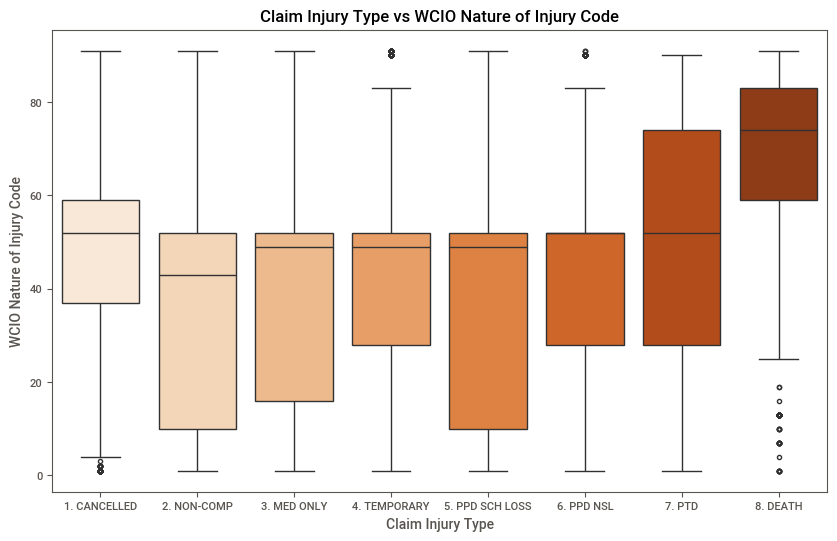

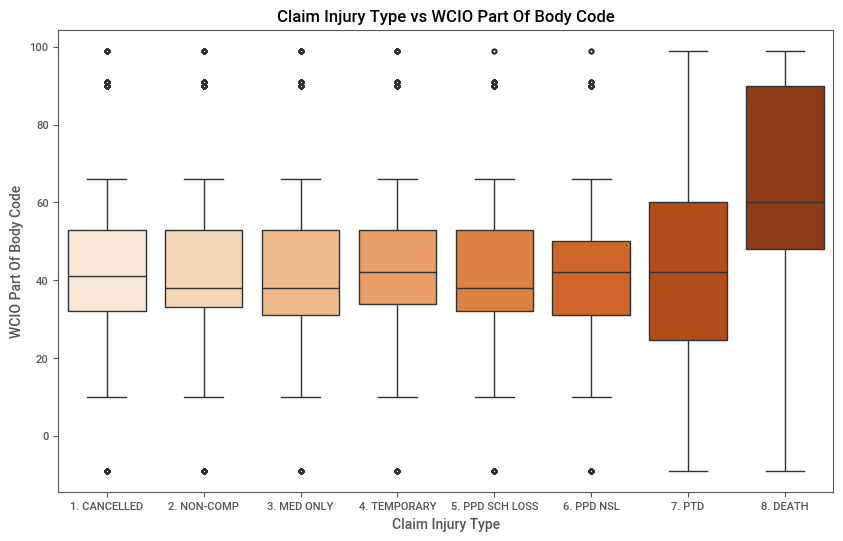

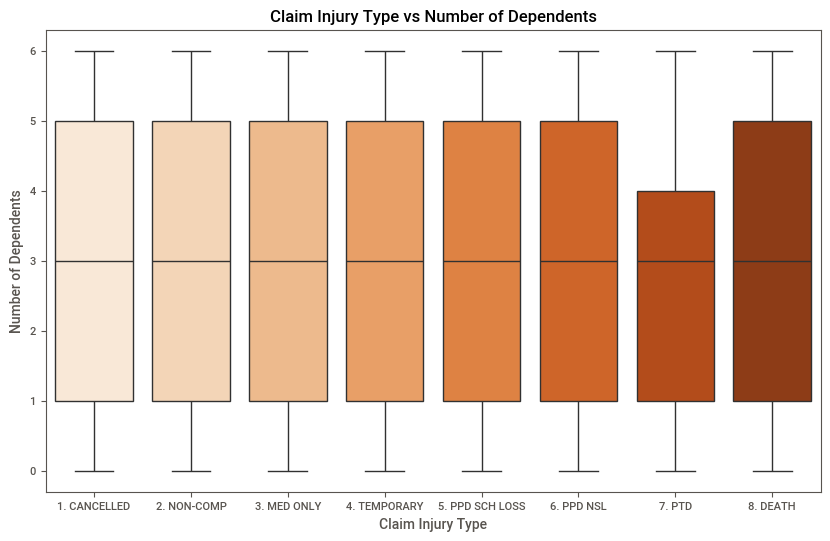

In [99]:
for column in discrete:
    v.plot_cat_vs_num(df, 'Claim Injury Type', column, plot_type = 'box')

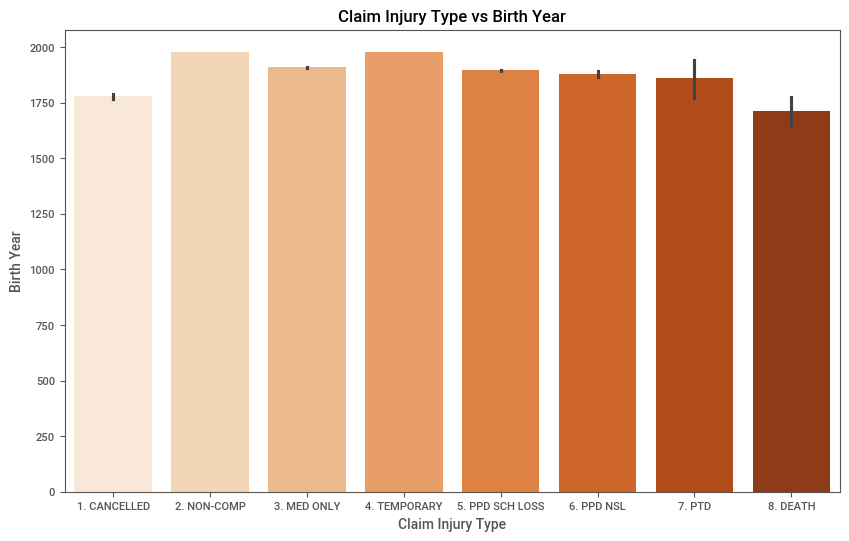

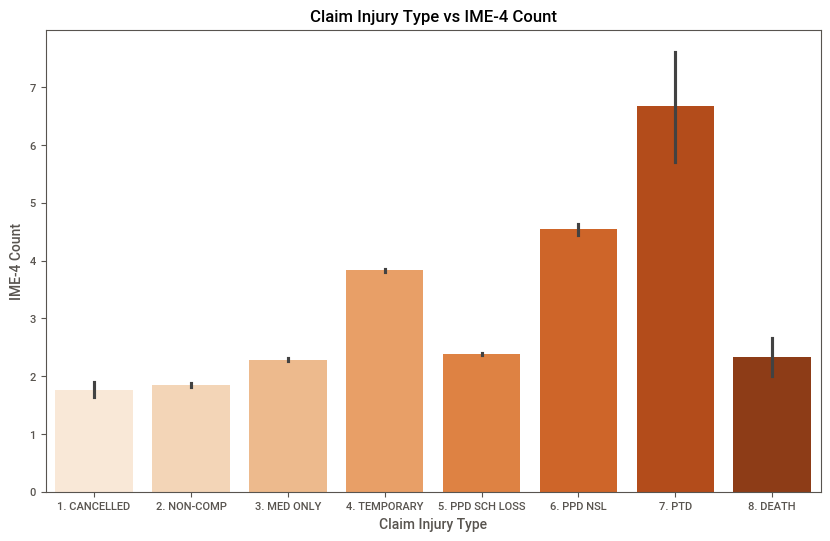

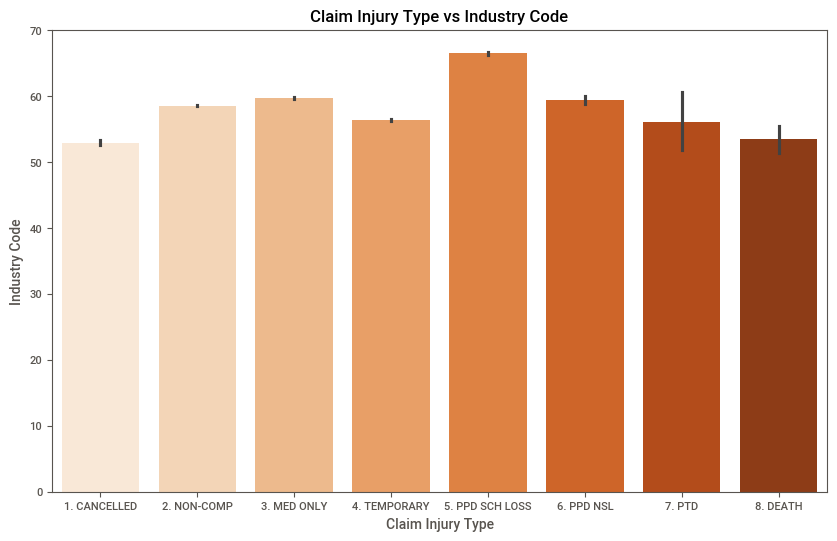

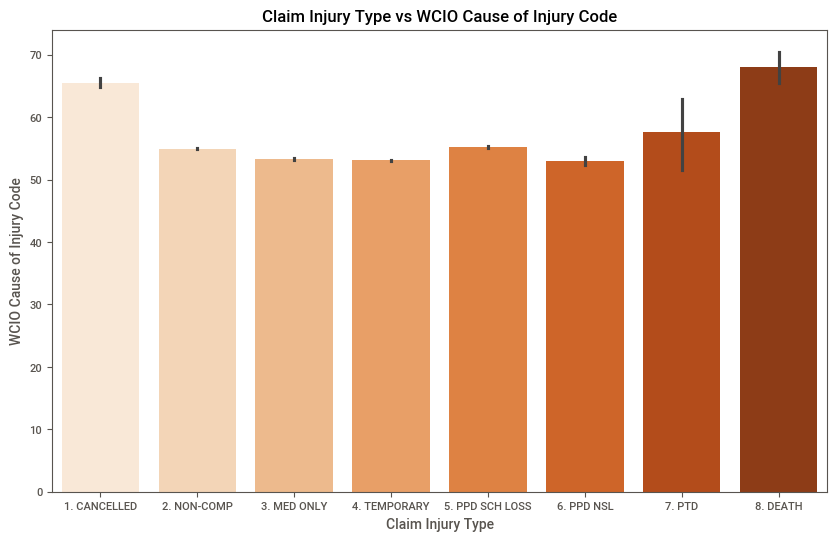

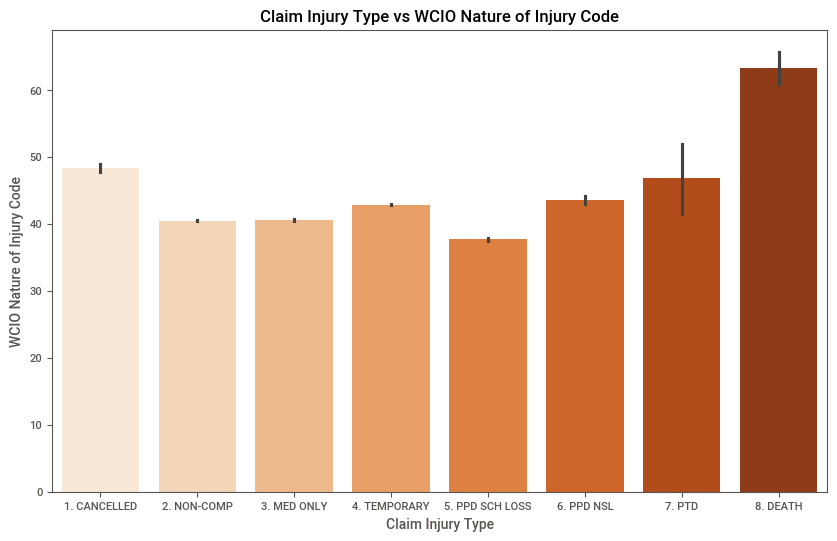

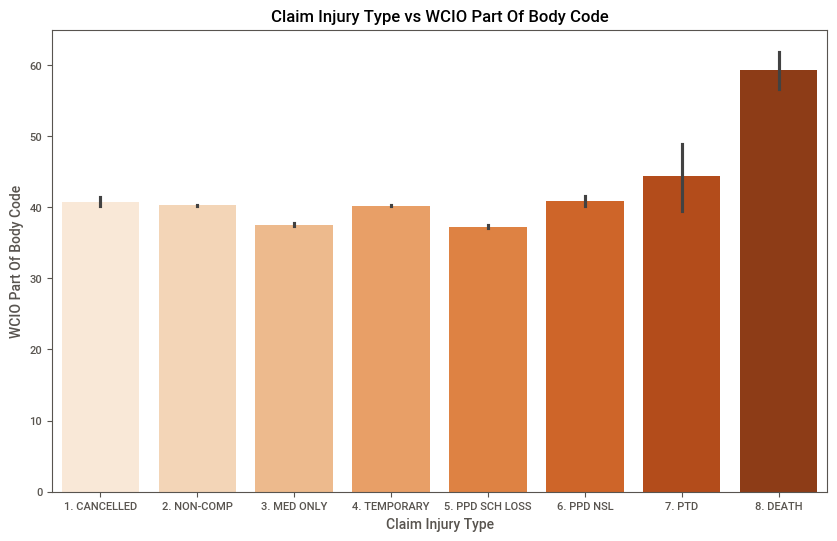

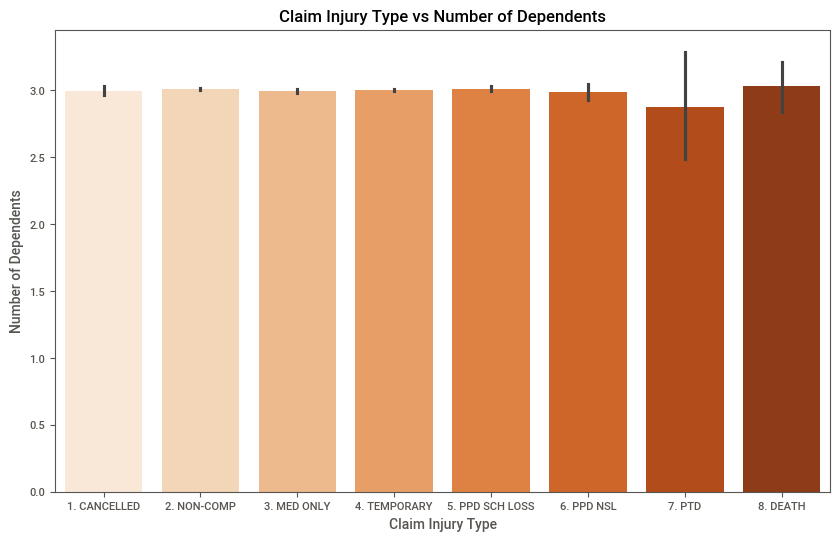

In [102]:
for column in discrete:
    v.plot_cat_vs_num(df, 'Claim Injury Type', column, plot_type = 'bar')

From these visualisations we can see that
- all but 2 categories (2 and 4) of `Claim Injury Type` have `Birth Year` equal to 0
- `IME-4 Count` has a considerably higher mean when `Claim Injury Type` is 7
- when `Claim Injury Type` is 8, WCIO Nature of Injury and Part of Body codes appear to have a higher mean
- `Number of Dependents` basically remains with the same min, mean and max values, independently of `Claim Injury Type`

**Categorical vs Numerical Continuous**

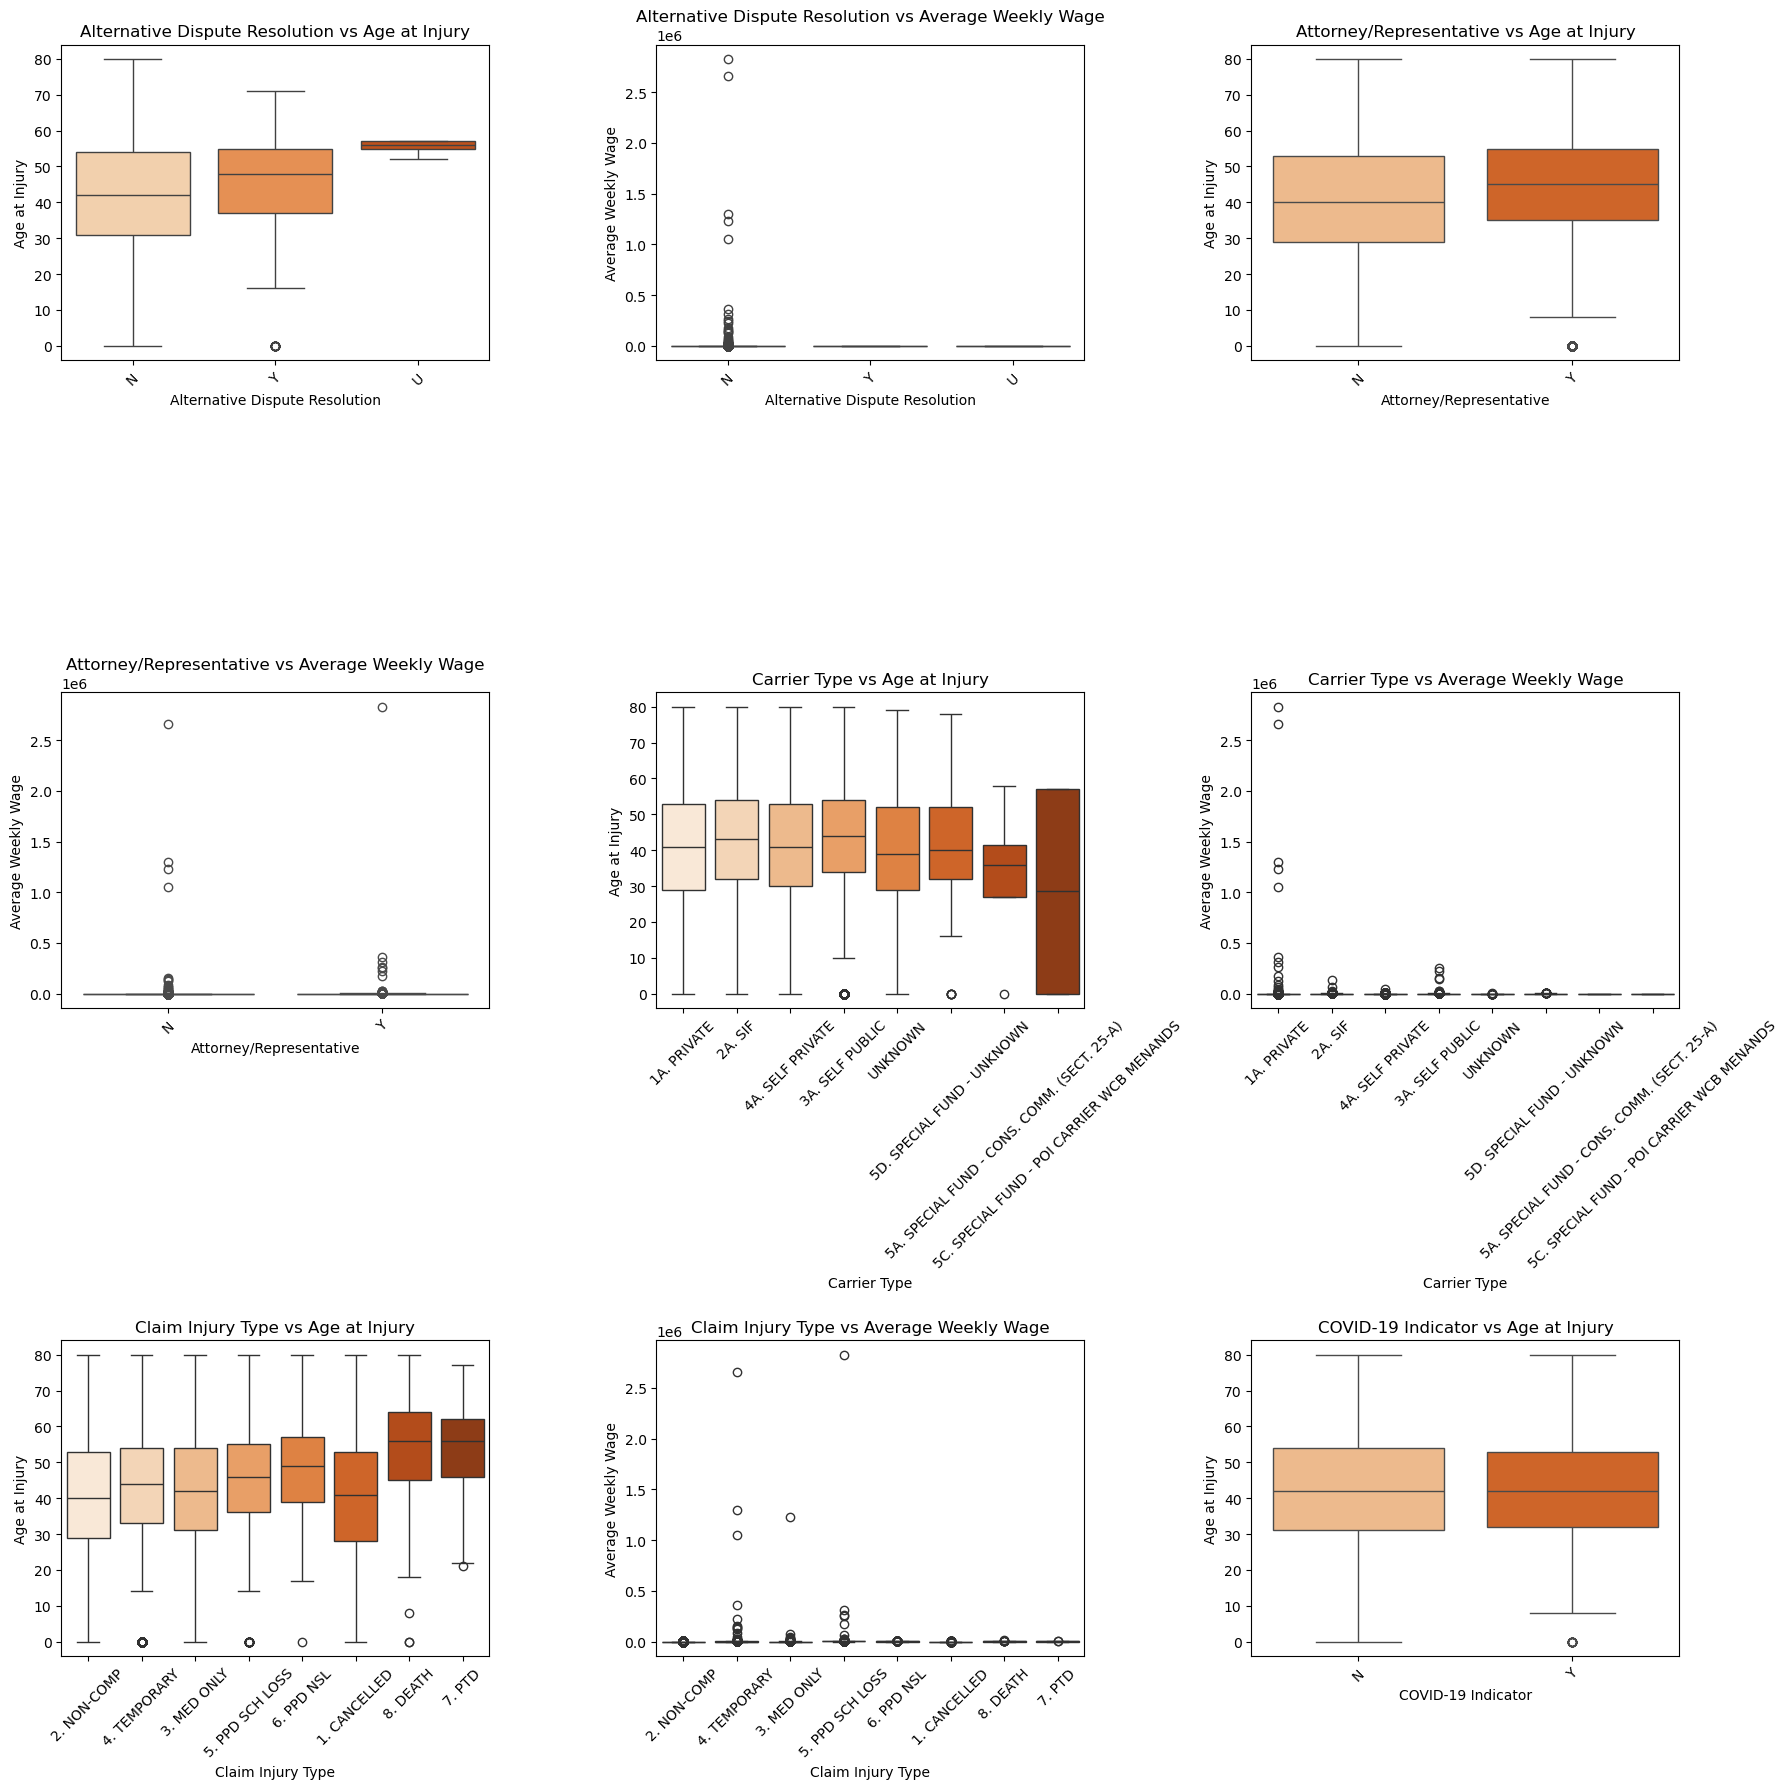

In [58]:
v.plot_categ_cont(df, categorical, continuous)

From these visualisations we can see that
- `Average Weekly Wage` only appears to show values not close to 0 when Alternative Dispute Resolution is N
- `Average Weekly Wage` is mostly close to zero independently of `Claim Injury Type`
- There are no signficant differences for `Age at Injury` when plotting it against `Attorney/Representative`nor `Covid-19 Indicator`


### Categorical vs Categorical

In this section we are going to include relevant visualisations of the interaction between categorical data. We will start with interactions between non-target categorical variables, and after doing so, produce some plots to better understand how each variable related to the target `Claim Injury Type`.

<a href="#top">Top &#129033;</a>

**County of Injury vs Medical Fee Region**

This visualisation is interesting, because we were not expecting for each county to be subdivided in as many as 5 different Medical Fee Regions.

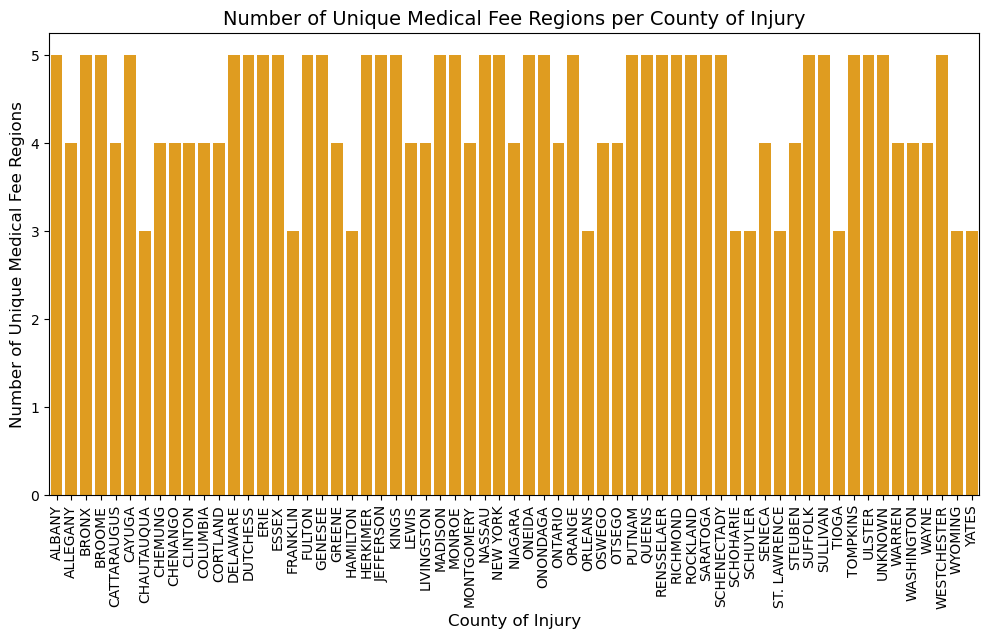

In [43]:
unique_region_counts = df.groupby('County of Injury')['Medical Fee Region'].nunique()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_region_counts.index, y=unique_region_counts.values, color='orange')
plt.title('Number of Unique Medical Fee Regions per County of Injury', fontsize=14)
plt.xlabel('County of Injury', fontsize=12)
plt.ylabel('Number of Unique Medical Fee Regions', fontsize=12)
plt.xticks(rotation=90)
plt.show()


**Alternative Dispute Resolution vs Claim Injury Type**

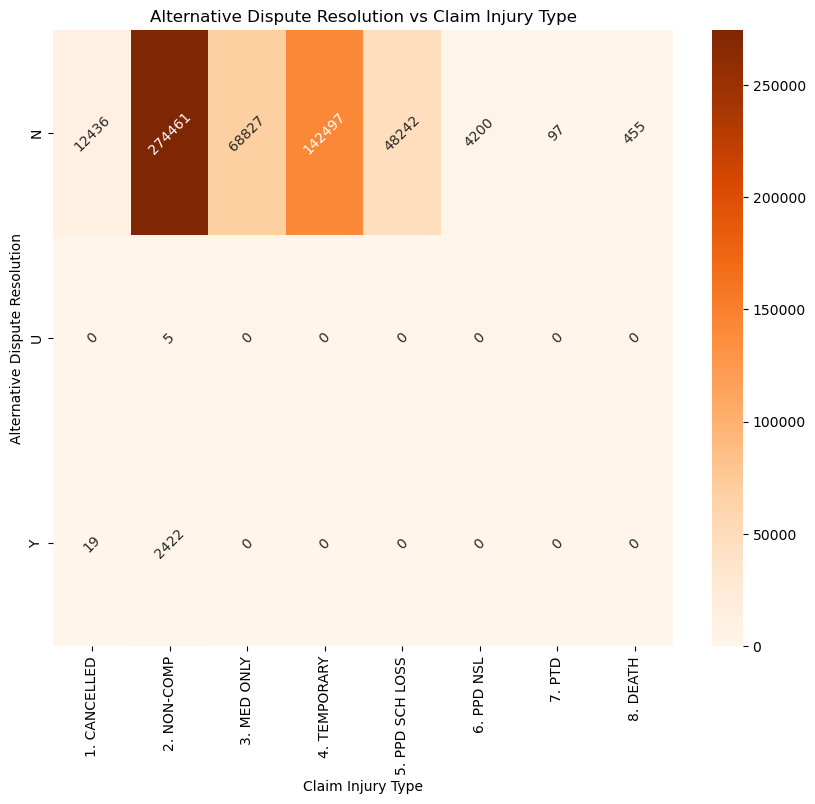

In [47]:
v.plot_crosstab(df, 'Alternative Dispute Resolution', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Attorney/Representative vs Claim Injury Type**

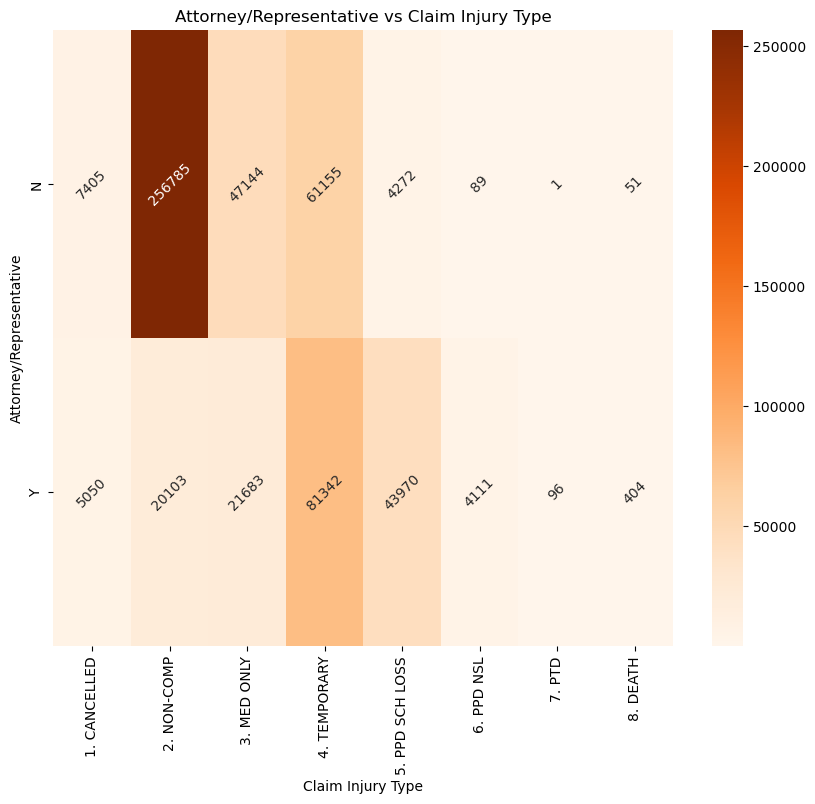

In [48]:
v.plot_crosstab(df, 'Attorney/Representative', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Carrier Type vs Claim Injury Type**

It is worth noting that `Carrier Type` categories 1, 2, 3, 4 include most observations of all injury types

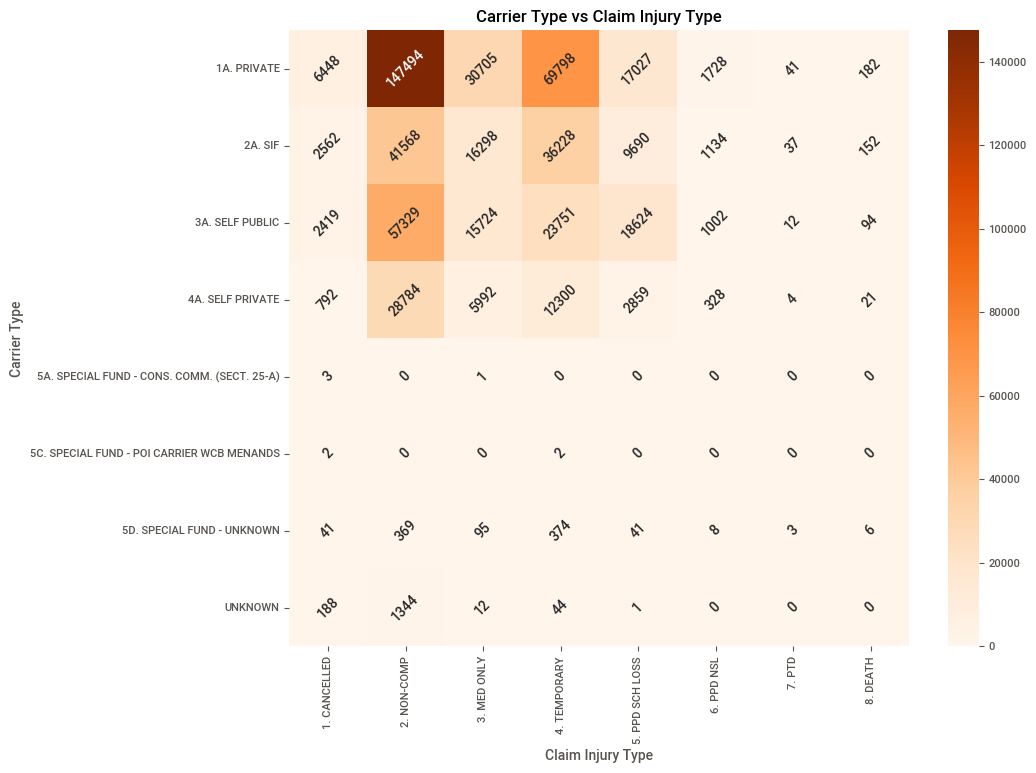

In [105]:
v.plot_crosstab(df, 'Carrier Type', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**COVID-19 Indicator vs Claim Injury Type**

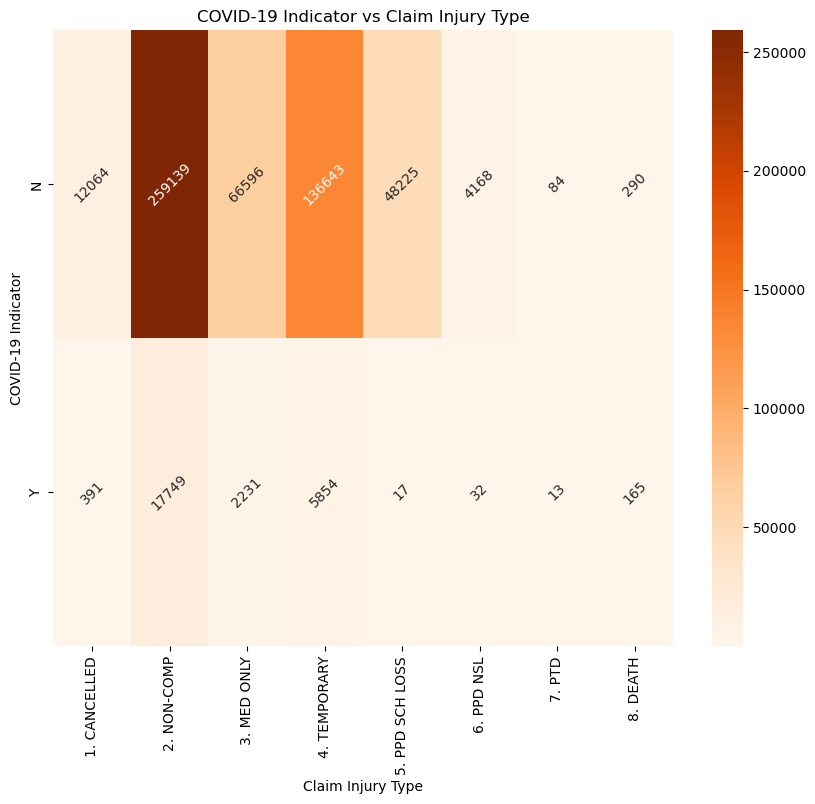

In [50]:
v.plot_crosstab(df, 'COVID-19 Indicator', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Gender vs Claim Injury Type**

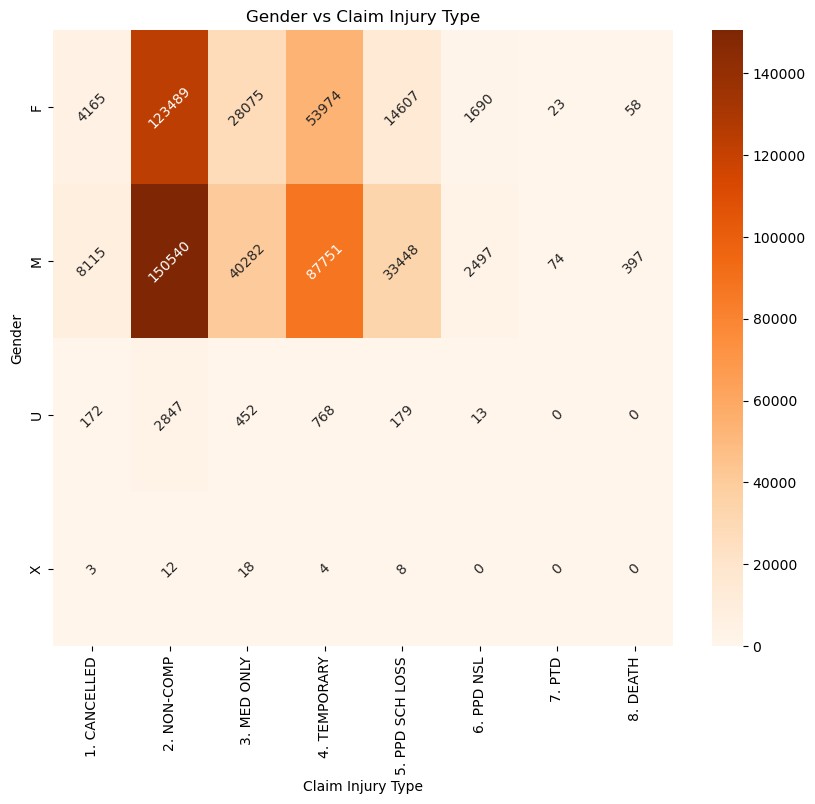

In [51]:
v.plot_crosstab(df, 'Gender', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Medical Fee Region vs Claim Injury Type**

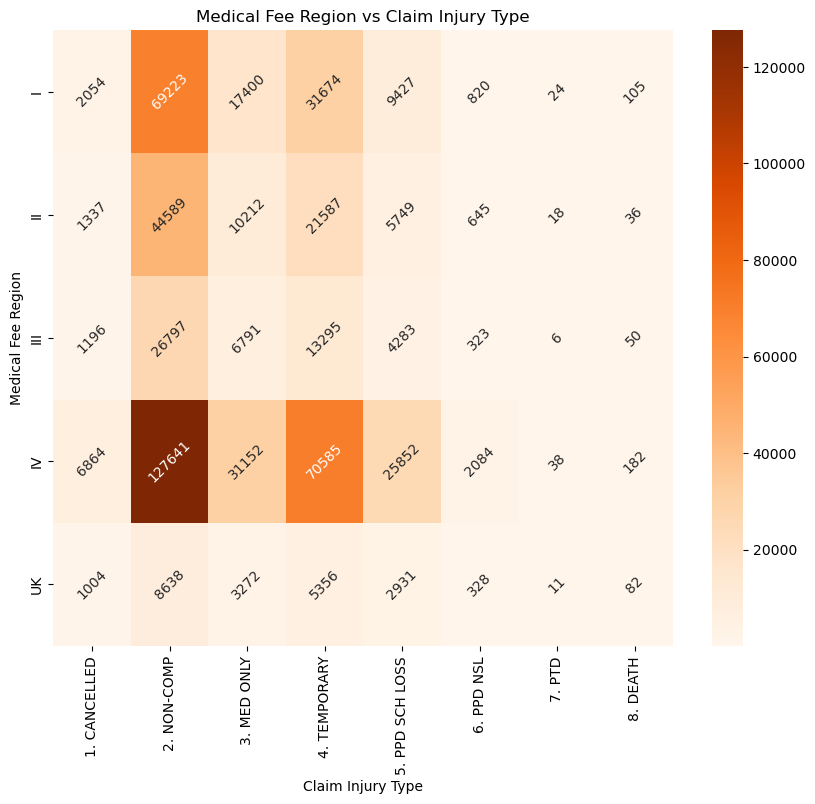

In [52]:
v.plot_crosstab(df, 'Medical Fee Region', 
              'Claim Injury Type', annot_kws={"rotation": 45})

# 3. Data Cleaning & Preprocessing
The cleaning process involves handling missing values, correcting errors, and addressing inconsistencies identified earlier. Preprocessing includes tasks such as feature engineering, encoding categorical variables, normalizing numerical data, and splitting the data into training and testing sets. These steps are essential to ensure that the dataset is both structured and suitable for developing robust and reliable machine learning models.

<a href="#top">Top &#129033;</a>

**Claim Injury Type**

Having noted that in DF there are missing values in this variable, we must address them before continuing. Since this is our target, when missing the entire observation cannot be used for training purposes, therefore must be dropped.

In [6]:
# Filter and display rows where the 'Claim Injury Type' column has missing values
df[df['Claim Injury Type'].isna()]

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
957648180                  NaT            NaN                            NaN   
363651794                  NaT            NaN                            NaN   
209507552                  NaT            NaN                            NaN   
970865999                  NaT            NaN                            NaN   
807753247                  NaT            NaN                            NaN   
...                        ...            ...                            ...   
365870975                  NaT            NaN                            NaN   
327160035                  NaT            NaN                            NaN   
249875936                  NaT            NaN                            NaN   
120584215                  NaT            NaN                            NaN   
818961390                  NaT            NaN                            NaN   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
957648180           2020-01-01                     NaN                  NaN   
363651794           2020-01-01                     NaN                  NaN   
209507552           2020-01-01                     NaN                  NaN   
970865999           2020-01-01                     NaN                  NaN   
807753247           2020-01-01                     NaN                  NaN   
...                        ...                     ...                  ...   
365870975           2022-12-31                     NaN                  NaN   
327160035           2022-12-31                     NaN                  NaN   
249875936           2022-12-31                     NaN                  NaN   
120584215           2022-12-31                     NaN                  NaN   
818961390           2022-12-31                     NaN                  NaN   

                  Birth Year C-2 Date C-3 Date Carrier Name Carrier Type  \
Claim Identifier                                                           
957648180                NaN      NaT      NaT          NaN          NaN   
363651794                NaN      NaT      NaT          NaN          NaN   
209507552                NaN      NaT      NaT          NaN          NaN   
970865999                NaN      NaT      NaT          NaN          NaN   
807753247                NaN      NaT      NaT          NaN          NaN   
...                      ...      ...      ...          ...          ...   
365870975                NaN      NaT      NaT          NaN          NaN   
327160035                NaN      NaT      NaT          NaN          NaN   
249875936                NaN      NaT      NaT          NaN          NaN   
120584215                NaN      NaT      NaT          NaN          NaN   
818961390                NaN      NaT      NaT          NaN          NaN   

                 Claim Injury Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                         
957648180                      NaN              NaN                NaN   
363651794                      NaN              NaN                NaN   
209507552                      NaN              NaN                NaN   
970865999                      NaN              NaN                NaN   
807753247                      NaN              NaN                NaN   
...                            ...              ...                ...   
365870975                      NaN              NaN                NaN   
327160035                      NaN              NaN                NaN   
249875936                      NaN              NaN                NaN   
120584215                      NaN              NaN                NaN   
818961390                      NaN              NaN                NaN 

In [7]:
# Remove rows with missing values in the 'Claim Injury Type' column
df.dropna(subset=['Claim Injury Type'], inplace=True)

Having treated our target, it must also be encoded.

In [8]:
# Map descriptive labels in 'Claim Injury Type' to numeric codes for consistency and modeling
label_mapping = {
    "1. CANCELLED": 0,
    "2. NON-COMP": 1,
    "3. MED ONLY": 2,
    "4. TEMPORARY": 3,
    "5. PPD SCH LOSS": 4,
    "6. PPD NSL": 5,
    "7. PTD": 6,
    "8. DEATH": 7
}

In [9]:
df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

## 3.1 Duplicates
In this section, we will focus on detecting and handling duplicates to ensure data integrity and improve model performance. Addressing duplicates is a crucial preprocessing step that contributes to better data quality and more reliable machine learning outcomes.

<a href="#top">Top &#129033;</a>

In [10]:
# Identify and return rows that are duplicates in the DataFrame
df[df.duplicated()]

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5686771                    NaT            0.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5686771             2021-03-25                       Y                  0.0   

                  Birth Year C-2 Date   C-3 Date               Carrier Name  \
Claim Identifier                                                              
5686771               1968.0      NaT 2021-03-16  ACE AMERICAN INSURANCE CO   

                 Carrier Type  Claim Injury Type County of Injury  \
Claim Identifier                                                    
5686771           1A. PRIVATE                  0          UNKNOWN   

                 COVID-19 Indicator District Name First Hearing Date Gender  \
Claim Identifier                                                              
5686771                           N           NYC         2022-10-24      M   

                  IME-4 Count  Industry Code Industry Code Description  \
Claim Identifier                                                         
5686771                   NaN            NaN                       NaN   

                 Medical Fee Region  WCIO Cause of Injury Code  \
Claim Identifier                                                 
5686771                          UK                        NaN   

                 WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
Claim Identifier                                                                
5686771                                       NaN                         NaN   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
5686771                                        NaN                     NaN   

                 WCIO Part Of Body Description Zip Code  Number of Dependents  
Claim Identifier                                                               
5686771                                    NaN    07032                   0.0

In [11]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

## 3.2 Feature Engineering
Feature engineering is the process of transforming raw data into meaningful features to improve machine learning model performance. Effective feature engineering helps enhance predictive accuracy, reduce overfitting, and optimize model outcomes. In this section, we will explore various techniques and their impact on improving machine learning models.

<a href="#top">Top &#129033;</a>

### 3.2.1 Class Grouping

In this section we will attempt to group classes of existing features. These will later be encoded

**Carrier Type**

DF contains 8 unique values, whereas test only contains 7. The difference is in '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'. Knowing this, we decided to group all '5' categories into a single one: 
- '5. SPECIAL FUND'

In [14]:
print(df['Carrier Type'].value_counts())
print(' ')
print(test['Carrier Type'].value_counts())

Carrier Type
1A. PRIVATE                                    285367
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64
 
Carrier Type
1A. PRIVATE                                    201827
3A. SELF PUBLIC                                 78948
2A. SIF                                         66189
4A. SELF PRIVATE                                38619
UNKNOWN                                          1642
5D. SPECIAL FUND - UNKNOWN                        748
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
Name: count, dtype: int64


In [15]:
mapping = {
    '5D. SPECIAL FUND - UNKNOWN': '5. SPECIAL FUND OR UNKNOWN',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5. SPECIAL FUND OR UNKNOWN',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5. SPECIAL FUND OR UNKNOWN',
    'UNKNOWN': '5. SPECIAL FUND OR UNKNOWN'
}

In [16]:
# Apply the mapping to standardize 'Carrier Type' values
df['Carrier Type'] = df['Carrier Type'].replace(mapping)

test['Carrier Type'] = test['Carrier Type'].replace(mapping)

**Gender**

As the number of 'X' and 'U' genders is very small compared with the others, they are going to be grouped and encoded as follows.
- M - 0
- F - 1
- U & X - U/X - 2

In [17]:
print(df['Gender'].value_counts())
print(' ')
print(test['Gender'].value_counts())

Gender
M    335217
F    234051
U      4711
X        46
Name: count, dtype: int64
 
Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64


In [18]:
mapping = {  
    'M': 'M',
    'F': 'F',
    'U': 'U/X',  
    'X': 'U/X'
}

df['Gender'] = df['Gender'].map(mapping)  
test['Gender'] = test['Gender'].map(mapping) 

Apply Ordinal Encoding

In [19]:
df['Gender Enc'] = df['Gender'].replace({'M': 0, 'F': 1, 'U/X': 2})
test['Gender Enc'] = test['Gender'].replace({'M': 0, 'F': 1, 'U/X': 2})

### 3.2.2 Feature Creation

<a href="#top">Top &#129033;</a>

**Date Columns**

For each date column, the Year, Month, Day and Week Day (0=Monday, 6=Sunday) will be extracted.

In [20]:
for column in df.columns:
    # Check if the column is a datetime type
    if pd.api.types.is_datetime64_any_dtype(df[column]) and column not in ['C-3 Date', 'First Hearing Date']:
        # Extract year, month, and day and create new columns
        df[f'{column} Year'] = df[column].dt.year
        df[f'{column} Month'] = df[column].dt.month
        df[f'{column} Day'] = df[column].dt.day
        df[f'{column} Day of Week'] = df[column].dt.weekday 
        
        test[f'{column} Year'] = test[column].dt.year
        test[f'{column} Month'] = test[column].dt.month
        test[f'{column} Day'] = test[column].dt.day
        test[f'{column} Day of Week'] = test[column].dt.weekday

**WCIO Codes**

All WCIO codes will be joined in a column. Before joining them, they will be transformed into integers. For this to be possible, missing values will be filled with a specific code, 0, which until now does not exist in any of the mentioned columns. We also needed to transform **WCIO Part Of Body Code** into the absolute value, since there was a negative code (-9). Before doing so, we ensured there was not any code with the same absolute number.

In [21]:
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].abs()
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].abs()

In [22]:
columns_to_join = [
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]

df[columns_to_join] = df[columns_to_join].fillna(0).astype(int)
test[columns_to_join] = test[columns_to_join].fillna(0).astype(int)

df['WCIO Codes'] = df[columns_to_join].astype(str).agg(''.join, axis=1).astype(int)
test['WCIO Codes'] = test[columns_to_join].astype(str).agg(''.join, axis=1).astype(int)

**Wage to Age Ratio**

In [23]:
df['Wage to Age Ratio'] = df['Average Weekly Wage'] / (df['Age at Injury'] + 1)

**Carrier Name**

Create a binary variable `Insurance` that identifies Carrier Names that include the initials "ins".

In [24]:
df['Insurance'] = df['Carrier Name'].str.contains('ins', case=False, na=False).astype(int)
test['Insurance'] = test['Carrier Name'].str.contains('ins', case=False, na=False).astype(int)

**Zip Code**

Will be transformed into a Zip Code Valid, which evaluates the validity of the Zip Code:
- 2 for missing values
- 0 for a valid numeric value
- 1 for non-numeric zip codes

In [25]:
# Create a new column 'Zip Code Valid' to flag the validity of the 'Zip Code' field
df['Zip Code Valid'] = df['Zip Code'].apply(
    lambda x: 2 if pd.isna(x)          
    else (1 if not str(x).isnumeric()   
          else 0)                       
)


test['Zip Code Valid'] = test['Zip Code'].apply(
    lambda x: 2 if pd.isna(x)          
    else (1 if not str(x).isnumeric()   
          else 0)                       
)

**Industry Code Description**

The descriptions of the Industries will be grouped by sectors, as follows:
- Public Services / Government:
    - Public Administration 
    - Health Care and Social Assistance 
    - Educational Services 
    - Arts, Entertainment, and Recreation 
- Business Services:
    - Professional, Scientific, and Technical Services 
    - Administrative and Support and Waste Management and Remediation
    - Information 
    - Management of Companies and Enterprises 
    - Finance and Insurance 
- Retail and Wholesale:
    - Retail Trade
    - Wholesale Trade 
    - Accommodation and Food Services 
- Manufacturing and Construction:
    - Manufacturing 
    - Construction 
- Transportation:
    - Transportation and Warehousing 
- Agriculture and Natural Resources:
    - Agriculture, Forestry, Fishing, and Hunting 
    - Mining
- Utilities 
    - Utilities
- Other Services
    - Other Services (Except Public Services)

    
Then, they will be encoded.


In [26]:
df['Industry Sector'] = df['Industry Code Description'].apply(u.group_industry)
test['Industry Sector'] = test['Industry Code Description'].apply(u.group_industry)

**Age Groups**

Creating groups for age as follows:
- Minors (0): Ages 0-17
- Adults (1): Ages 18-64
- Seniors (2): Ages 65+

In [27]:
bins = [-1, 17, 64, 117]
labels = [0, 1, 2]

df['Age Group'] = pd.cut(df['Age at Injury'], bins=bins, labels=labels, right=True)

test['Age Group'] = pd.cut(test['Age at Injury'], bins=bins, labels=labels, right=True)

Drop treated and unnecessary columns before continuing.

In [141]:
# # Columns to drop:
# to_drop = ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative',
#               'C-2 Date', 'Carrier Name','County of Injury', 'COVID-19 Indicator', 'District Name',
#               'Medical Fee Region', 'Zip Code', 'Industry Sector']

# to_drop2 = ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
#               'WCIO Part Of Body Description', 'Industry Code Description']

# all_drop = to_drop + to_drop2

In [29]:
df.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   

                  Birth Year   C-2 Date   C-3 Date  \
Claim Identifier                                     
5393875               1988.0 2019-12-31        NaT   
5393091               1973.0 2020-01-01 2020-01-14   

                                  Carrier Name Carrier Type  \
Claim Identifier                                              
5393875             NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE   
5393091           ZURICH AMERICAN INSURANCE CO  1A. PRIVATE   

                  Claim Injury Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                          
5393875                           1     ST. LAWRENCE                  N   
5393091                           3          WYOMING                  N   

                 District Name First Hearing Date Gender  IME-4 Count  \
Claim Identifier                                                        
5393875               SYRACUSE                NaT      M          NaN   
5393091              ROCHESTER         2020-02-21      F          4.0   

                  Industry Code Industry Code Description Medical Fee Region  \
Claim Identifier                                                               
5393875                    44.0              RETAIL TRADE                  I   
5393091                    23.0              CONSTRUCTION                  I   

                  WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
5393875                                  27     FROM LIQUID OR GREASE SPILLS   
5393091                                  97                REPETITIVE MOTION   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
5393875                                   10   
5393091                                   49   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
5393875                                  CONTUSION                      62   
5393091                             SPRAIN OR TEAR                      38   

                 WCIO Part Of Body Description Zip Code  Number of Dependents  \
Claim Identifier                                                                
5393875                               BUTTOCKS    13662                   1.0   
5393091                            SHOULDER(S)    14569                   4.0   

                  Gender Enc  Accident Date Year  Accident Date Month  \
Claim Identifier                                                        
5393875                    0              2019.0                 12.0   
5393091                    1              2019.0                  8.0   

                  Accident Date Day  Accident Date Day of Week  \
Claim Identifier                                                 
5393875                        30.0                        0.0   
5393091                        30.0                        4.0   

                  Assembly Date Year  Assembly Date Month  Assembly Date Day  \
Claim Identifier                                                               
5393875                         2020                    1                  1   
5393091                         2020        

In [30]:
drop = ['Accident Date', 'Assembly Date', 
        'C-2 Date', 'Zip Code', 'WCIO Cause of Injury Description',
        'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']

In [31]:
df.drop(columns = drop, axis = 1, inplace = True)
test.drop(columns = drop, axis = 1, inplace = True)

# 5. Export

<a href="#top">Top &#129033;</a>

In [12]:
# test.head(2)

In [13]:
# df.head(2)

In [38]:
df.to_csv('data/train_data_EDA.csv')
test.to_csv('./data/test_data_EDA.csv')